# Lectura de los datos

In [1]:
import pandas as pd

In [2]:
data = pd.read_excel('/content/DATOS.xlsx')

In [3]:
data.shape

(3974, 11)

In [4]:
df = data.copy()

In [5]:
df.head()

FECHA  COLCAP  EMBI    DOLAR    CIB  FTSE COLOMBIA    EMM  BRENT  \
0 2009-02-10  879.72  4.75  2501.00  19.72        2452.51  23.17  44.61   
1 2009-02-11  874.27  4.89  2539.20  19.00        2438.27  23.87  44.28   
2 2009-02-12  865.27  4.97  2527.00  18.85        2404.89  23.72  44.65   
3 2009-02-13  879.41  4.77  2498.50  18.95        2452.28  23.84  44.81   
4 2009-02-16  878.55  4.77  2511.75  18.95        2443.00  23.84  43.28   

     GXG    ILF  TASA_INTERES_PM  
0  30.00  26.39              9.0  
1  30.00  26.55              9.0  
2  30.00  26.68              9.0  
3  30.48  26.96              9.0  
4  30.48  26.96              9.0

In [ ]:
df.sort_values(by='FECHA', inplace=True)
df = df.iloc[:-3]
df.tail()

FECHA   COLCAP  EMBI    DOLAR    CIB  FTSE COLOMBIA    EMM  BRENT  \
3966 2024-04-24  1343.34  2.97  3939.99  32.07        3774.65  41.02  88.02   
3967 2024-04-25  1349.93  3.00  3957.57  31.39        3746.84  40.77  89.01   
3968 2024-04-26  1366.61  3.00  3901.00  32.82        3792.22  40.84  89.50   
3969 2024-04-29  1381.01  2.94  3866.40  33.69        3859.58  40.64  88.40   
3970 2024-04-30  1357.31  3.03  3924.48  32.72        3793.68  41.10  87.86   

        GXG    ILF  TASA_INTERES_PM  
3966  25.10  27.93            12.25  
3967  25.10  27.92            12.25  
3968  25.53  27.73            12.25  
3969  26.21  28.48            12.25  
3970  25.59  28.30            12.25

In [ ]:
df.index = df['FECHA']

In [ ]:
df.drop('FECHA', axis=1, inplace=True)

In [ ]:
# Frecuencia días laborales
df = df.asfreq('B')
df.isna().sum()

COLCAP             0
EMBI               0
DOLAR              0
CIB                0
FTSE COLOMBIA      0
EMM                0
BRENT              0
GXG                0
ILF                0
TASA_INTERES_PM    0
dtype: int64

# Análisis descriptivo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Descripción de los datos
descriptive_stats = df.describe()
descriptive_stats

COLCAP         EMBI        DOLAR          CIB  FTSE COLOMBIA  \
count  3971.000000  3971.000000  3971.000000  3971.000000    3971.000000   
mean   1441.325467     2.344530  2866.270672    43.717033    4354.844984   
std     216.872950     0.846866   887.572650    13.036328     672.569856   
min     825.170000     0.960000  1747.650000    16.230000    2289.550000   
25%    1291.675000     1.740000  1928.625000    32.620000    3881.800000   
50%    1440.580000     2.060000  2922.880000    42.950000    4351.910000   
75%    1614.050000     2.860000  3616.000000    55.370000    4904.915000   
max    1942.370000     5.220000  5117.000000    70.490000    5807.490000   

               EMM        BRENT          GXG          ILF  TASA_INTERES_PM  
count  3971.000000  3971.000000  3971.000000  3971.000000      3971.000000  
mean     41.283289    77.558514    48.190375    33.772073         5.243264  
std       5.423707    24.308511    22.619155     8.613220         2.931062  
min      19.820000    19.330000     9.640000    15.640000         1.750000  
25%      38.505000    57.905000    30.130000    27.070000         3.500000  
50%      40.960000    75.510000    39.080000    32.060000         4.500000  
75%      43.980000   101.115000    72.440000    40.090000         5.750000  
max      57.960000   127.980000    95.380000    54.940000        13.250000

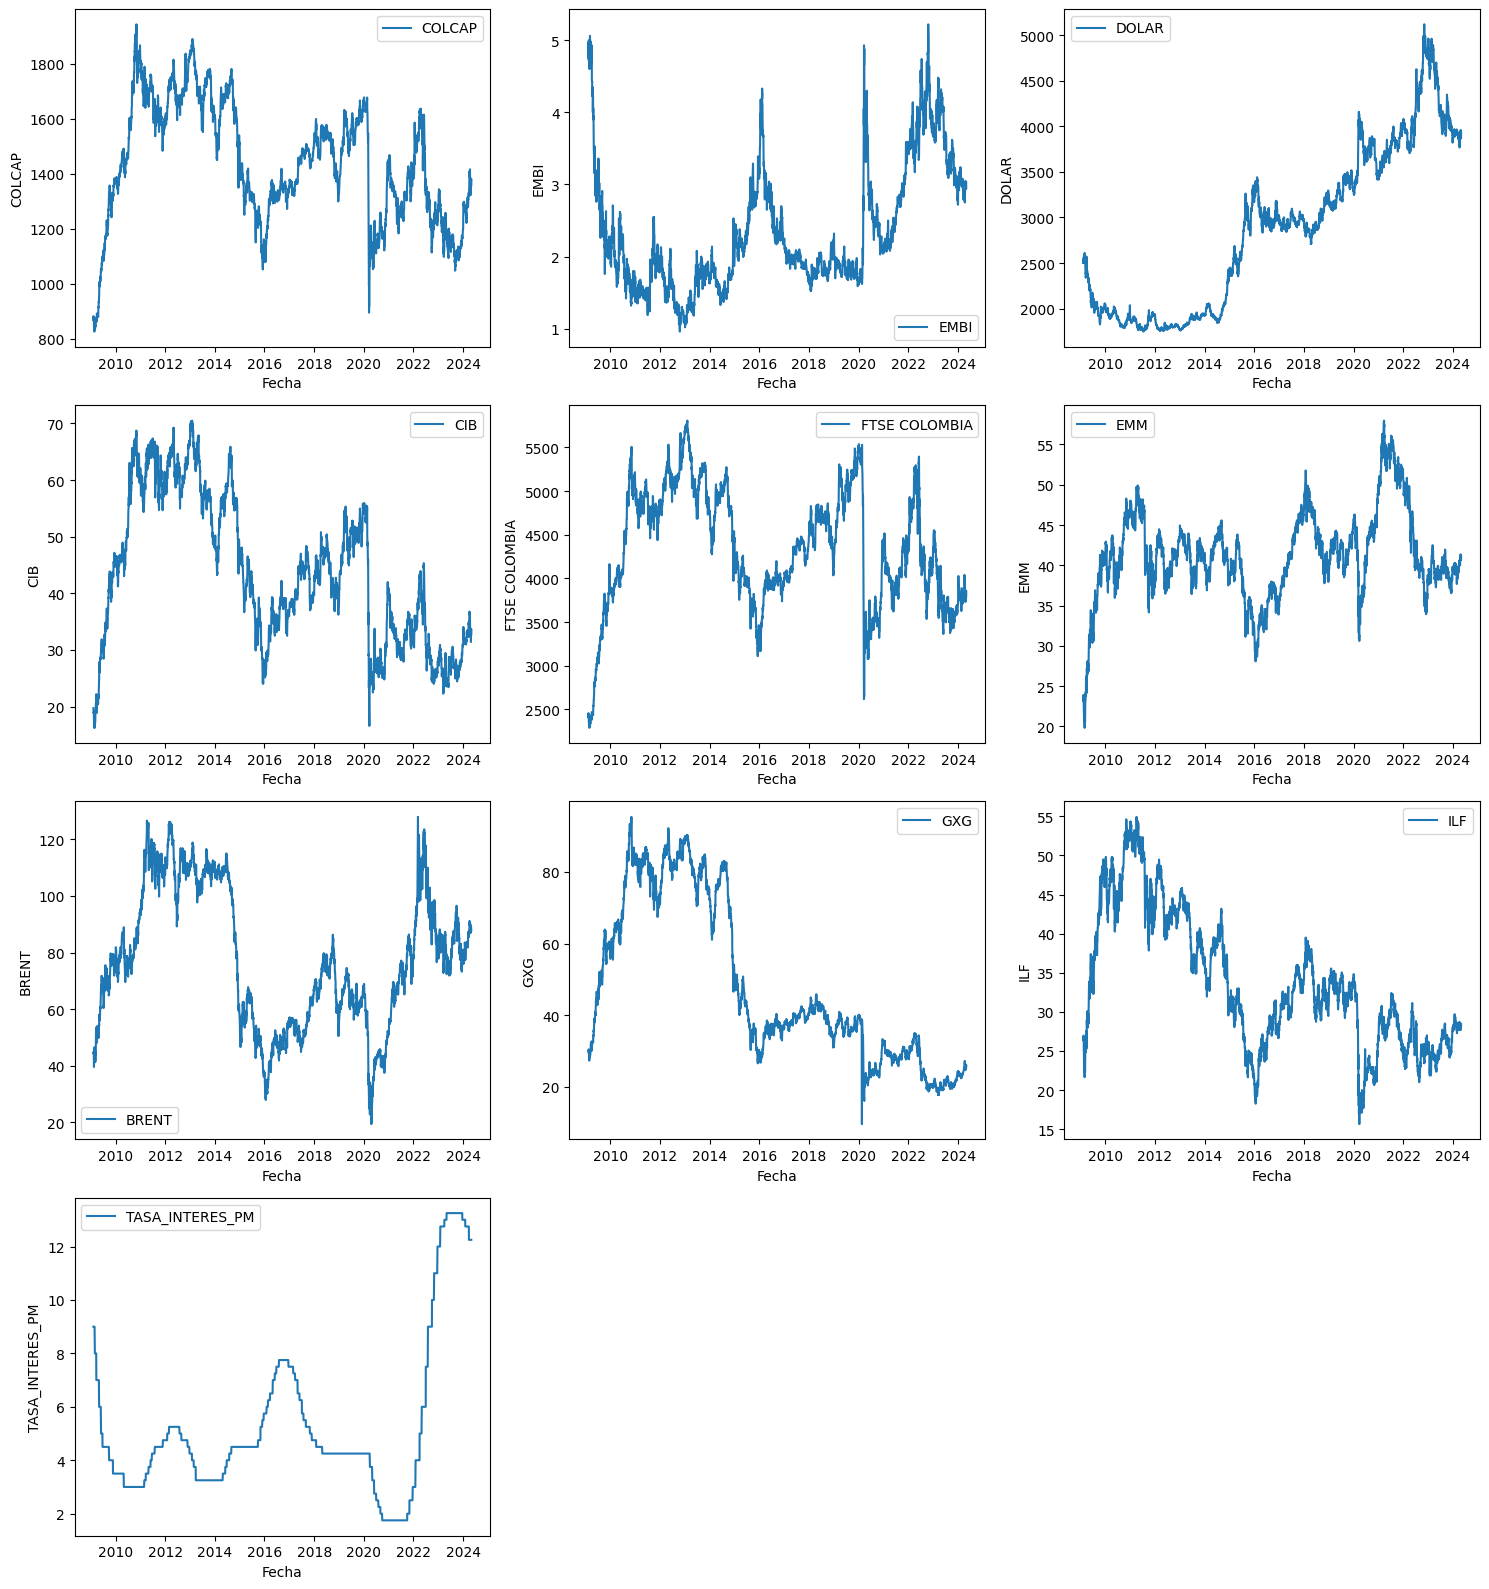

In [ ]:
import math

# Configuración de la cuadrícula de subplots
num_columns = len(df.columns)

cols = 3  # Número de columnas fijas en la cuadrícula
rows = math.ceil(num_columns / cols)  # Calcula el número de filas necesarias

plt.figure(figsize=(cols * 5, rows * 4))

for i, column in enumerate(df.columns, 1):
    plt.subplot(rows, cols, i)
    plt.plot(df[column], label=column)
    plt.xlabel('Fecha')
    plt.ylabel(column)
    plt.legend()

plt.tight_layout()
plt.show()

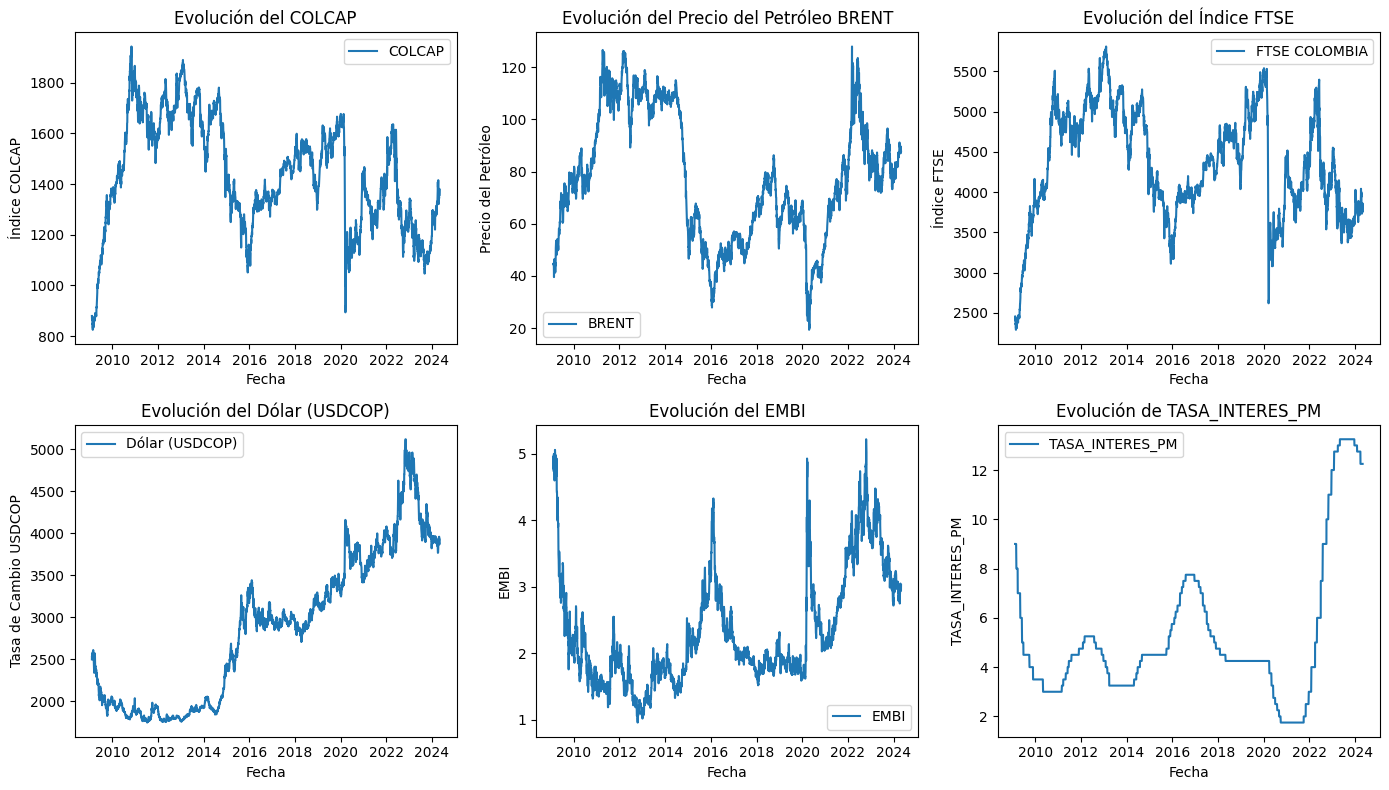

In [ ]:
# Visualización de las series temporales
plt.figure(figsize=(14, 8))

plt.subplot(2, 3, 1)
plt.plot(df['COLCAP'], label='COLCAP')
plt.title('Evolución del COLCAP')
plt.xlabel('Fecha')
plt.ylabel('Índice COLCAP')
plt.legend()

plt.subplot(2, 3, 2)
plt.plot(df['BRENT'], label='BRENT')
plt.title('Evolución del Precio del Petróleo BRENT')
plt.xlabel('Fecha')
plt.ylabel('Precio del Petróleo')
plt.legend()

plt.subplot(2, 3, 3)
plt.plot(df['FTSE COLOMBIA'], label='FTSE COLOMBIA')
plt.title('Evolución del Índice FTSE')
plt.xlabel('Fecha')
plt.ylabel('Índice FTSE')
plt.legend()

plt.subplot(2, 3, 4)
plt.plot(df['DOLAR'], label='Dólar (USDCOP)')
plt.title('Evolución del Dólar (USDCOP)')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Cambio USDCOP')
plt.legend()

plt.subplot(2, 3, 5)
plt.plot(df['EMBI'], label='EMBI')
plt.title('Evolución del EMBI')
plt.xlabel('Fecha')
plt.ylabel('EMBI')
plt.legend()

plt.subplot(2, 3, 6)
plt.plot(df['TASA_INTERES_PM'], label='TASA_INTERES_PM')
plt.title('Evolución de TASA_INTERES_PM')
plt.xlabel('Fecha')
plt.ylabel('TASA_INTERES_PM')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Análisis de correlación
correlation_matrix = df.corr()
correlation_matrix

COLCAP      EMBI     DOLAR       CIB  FTSE COLOMBIA  \
COLCAP           1.000000 -0.770477 -0.603253  0.936789       0.955642   
EMBI            -0.770477  1.000000  0.717492 -0.824768      -0.671524   
DOLAR           -0.603253  0.717492  1.000000 -0.781732      -0.399064   
CIB              0.936789 -0.824768 -0.781732  1.000000       0.848670   
FTSE COLOMBIA    0.955642 -0.671524 -0.399064  0.848670       1.000000   
EMM              0.417635 -0.364703  0.075103  0.259230       0.440194   
BRENT            0.642065 -0.301218 -0.406471  0.620871       0.623179   
GXG              0.800132 -0.718619 -0.909681  0.907180       0.638414   
ILF              0.716976 -0.705849 -0.818370  0.835016       0.551183   
TASA_INTERES_PM -0.429370  0.542967  0.490267 -0.431954      -0.329827   

                      EMM     BRENT       GXG       ILF  TASA_INTERES_PM  
COLCAP           0.417635  0.642065  0.800132  0.716976        -0.429370  
EMBI            -0.364703 -0.301218 -0.718619 -0.705849         0.542967  
DOLAR            0.075103 -0.406471 -0.909681 -0.818370         0.490267  
CIB              0.259230  0.620871  0.907180  0.835016        -0.431954  
FTSE COLOMBIA    0.440194  0.623179  0.638414  0.551183        -0.329827  
EMM              1.000000  0.280297  0.102473  0.250235        -0.428335  
BRENT            0.280297  1.000000  0.664165  0.606179        -0.025240  
GXG              0.102473  0.664165  1.000000  0.881269        -0.428928  
ILF              0.250235  0.606179  0.881269  1.000000        -0.370273  
TASA_INTERES_PM -0.428335 -0.025240 -0.428928 -0.370273         1.000000

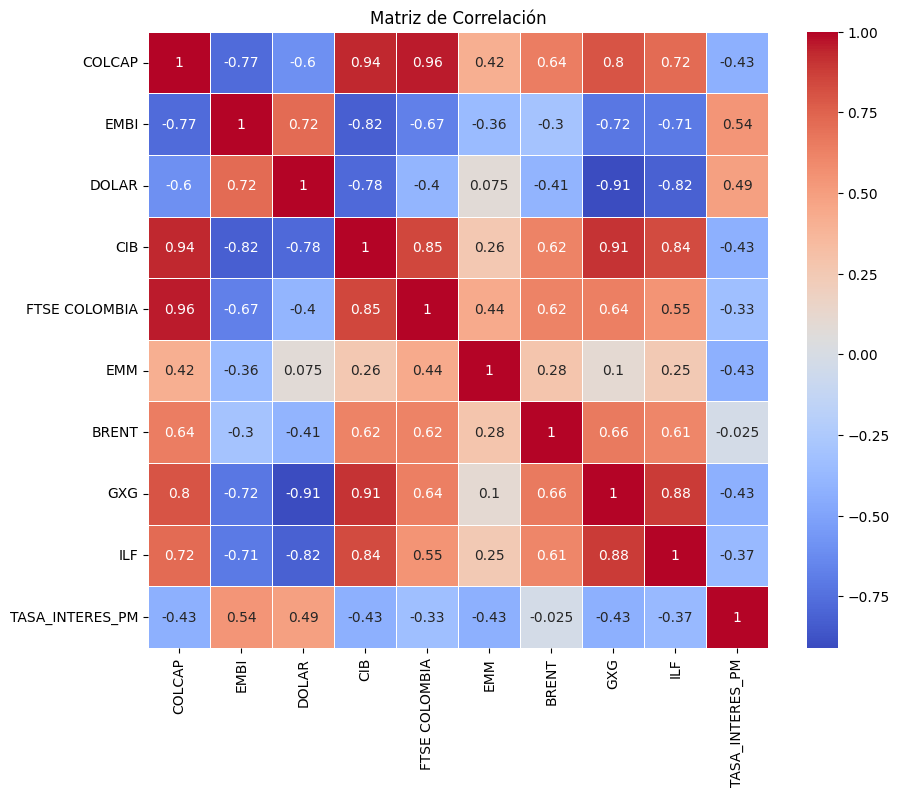

In [ ]:


# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

# Análisis de Estacionariedad

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

In [ ]:
# Definir una función para realizar y mostrar los resultados de las pruebas ADF y KPSS
def stationarity_tests(timeseries, series_name):
    print(f"Resultados de la Prueba ADF para {series_name}:")
    adf_test = adfuller(timeseries)
    print(f"ADF Statistic: {adf_test[0]}")
    print(f"p-value: {adf_test[1]}")
    for key, value in adf_test[4].items():
        print(f'Critical Value ({key}): {value}')
    print()



In [ ]:
df.columns

Index(['COLCAP', 'EMBI', 'DOLAR', 'CIB', 'FTSE COLOMBIA', 'EMM', 'BRENT',
       'GXG', 'ILF', 'TASA_INTERES_PM'],
      dtype='object')

In [ ]:
# Aplicamos las pruebas a cada serie temporal
series = df.columns

for serie in series:
    print(f"Analizando la serie: {serie}")
    stationarity_tests(df[serie], serie)

Analizando la serie: COLCAP
Resultados de la Prueba ADF para COLCAP:
ADF Statistic: -3.2299876955665456
p-value: 0.01831318251475142
Critical Value (1%): -3.431999076458594
Critical Value (5%): -2.862268671768981
Critical Value (10%): -2.5671578800184744

Analizando la serie: EMBI
Resultados de la Prueba ADF para EMBI:
ADF Statistic: -3.595820765879741
p-value: 0.005841430224744039
Critical Value (1%): -3.4320057572255886
Critical Value (5%): -2.8622716229554492
Critical Value (10%): -2.5671594511081355

Analizando la serie: DOLAR
Resultados de la Prueba ADF para DOLAR:
ADF Statistic: -0.7041651437954959
p-value: 0.8456677198436169
Critical Value (1%): -3.4320019926487095
Critical Value (5%): -2.8622699599782915
Critical Value (10%): -2.567158565807713

Analizando la serie: CIB
Resultados de la Prueba ADF para CIB:
ADF Statistic: -2.462367317729086
p-value: 0.12490126361876858
Critical Value (1%): -3.431999076458594
Critical Value (5%): -2.862268671768981
Critical Value (10%): -2.56715

# Transformación de las series NO ESTACIONARIAS


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Función para aplicar diferenciación y verificar estacionariedad
def difference_and_test_stationarity(series, series_name, diff_order=1):
    differenced_series = series.diff(diff_order).dropna()

    # Prueba ADF en la serie diferenciada
    adf_result = adfuller(differenced_series)
    adf_statistic = adf_result[0]
    p_value = adf_result[1]
    critical_values = adf_result[4]

    print(f'Resultados de la Prueba ADF para la serie diferenciada {series_name}:')
    print(f'ADF Statistic: {adf_statistic}')
    print(f'p-value: {p_value}')
    for key, value in critical_values.items():
        print(f'Critical Value ({key}): {value}')

    print()

    return differenced_series



In [ ]:
# Transformar y verificar estacionariedad de cada serie
transformed_series = {}
for series_name in df.columns:
    print(f'Transformando la serie: {series_name}')
    transformed_series[series_name] = difference_and_test_stationarity(df[series_name], series_name)

Transformando la serie: COLCAP
Resultados de la Prueba ADF para la serie diferenciada COLCAP:
ADF Statistic: -39.14855313170367
p-value: 0.0
Critical Value (1%): -3.431999076458594
Critical Value (5%): -2.862268671768981
Critical Value (10%): -2.5671578800184744

Transformando la serie: EMBI
Resultados de la Prueba ADF para la serie diferenciada EMBI:
ADF Statistic: -15.341855466297368
p-value: 3.821675711961268e-28
Critical Value (1%): -3.4320057572255886
Critical Value (5%): -2.8622716229554492
Critical Value (10%): -2.5671594511081355

Transformando la serie: DOLAR
Resultados de la Prueba ADF para la serie diferenciada DOLAR:
ADF Statistic: -19.944559458232764
p-value: 0.0
Critical Value (1%): -3.4320019926487095
Critical Value (5%): -2.8622699599782915
Critical Value (10%): -2.567158565807713

Transformando la serie: CIB
Resultados de la Prueba ADF para la serie diferenciada CIB:
ADF Statistic: -41.401689936799116
p-value: 0.0
Critical Value (1%): -3.431999076458594
Critical Value 

In [ ]:
# se crea el dataframe con las series estacionarias
transformed_series.keys()

dict_keys(['COLCAP', 'EMBI', 'DOLAR', 'CIB', 'FTSE COLOMBIA', 'EMM', 'BRENT', 'GXG', 'ILF', 'TASA_INTERES_PM'])

In [ ]:
df_estacionarias = pd.DataFrame(transformed_series)
df_estacionarias

COLCAP  EMBI  DOLAR   CIB  FTSE COLOMBIA   EMM  BRENT   GXG   ILF  \
FECHA                                                                           
2009-02-11   -5.45  0.14  38.20 -0.72         -14.24  0.70  -0.33  0.00  0.16   
2009-02-12   -9.00  0.08 -12.20 -0.15         -33.38 -0.15   0.37  0.00  0.13   
2009-02-13   14.14 -0.20 -28.50  0.10          47.39  0.12   0.16  0.48  0.28   
2009-02-16   -0.86  0.00  13.25  0.00          -9.28  0.00  -1.53  0.00  0.00   
2009-02-17  -20.90  0.23  50.25 -1.24         -58.95 -1.52  -2.25 -1.14 -1.86   
...            ...   ...    ...   ...            ...   ...    ...   ...   ...   
2024-04-24   -4.59 -0.01  29.89 -0.55          16.34 -0.21  -0.40 -0.36 -0.16   
2024-04-25    6.59  0.03  17.58 -0.68         -27.81 -0.25   0.99  0.00 -0.01   
2024-04-26   16.68  0.00 -56.57  1.43          45.38  0.07   0.49  0.43 -0.19   
2024-04-29   14.40 -0.06 -34.60  0.87          67.36 -0.20  -1.10  0.68  0.75   
2024-04-30  -23.70  0.09  58.08 -0.97         -65.90  0.46  -0.54 -0.62 -0.18   

            TASA_INTERES_PM  
FECHA                        
2009-02-11              0.0  
2009-02-12              0.0  
2009-02-13              0.0  
2009-02-16              0.0  
2009-02-17              0.0  
...                     ...  
2024-04-24              0.0  
2024-04-25              0.0  
2024-04-26              0.0  
2024-04-29              0.0  
2024-04-30              0.0  

[3970 rows x 10 columns]

# Descomposición de la serie (Tendencia, estacionalidad y ruido)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Función para descomponer y graficar las series temporales
def decompose_series(series, series_name, model='additive', freq=365):
    decomposition = seasonal_decompose(series, model=model, period=freq)

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))
    decomposition.observed.plot(ax=ax1)
    ax1.set_ylabel('Observada')
    ax1.set_title(f'Decomposición de la serie {series_name}')

    decomposition.trend.plot(ax=ax2)
    ax2.set_ylabel('Tendencia')

    decomposition.seasonal.plot(ax=ax3)
    ax3.set_ylabel('Estacionalidad')

    decomposition.resid.plot(ax=ax4)
    ax4.set_ylabel('Residual')

    plt.tight_layout()
    plt.show()

    return decomposition

Decomponiendo la serie: COLCAP


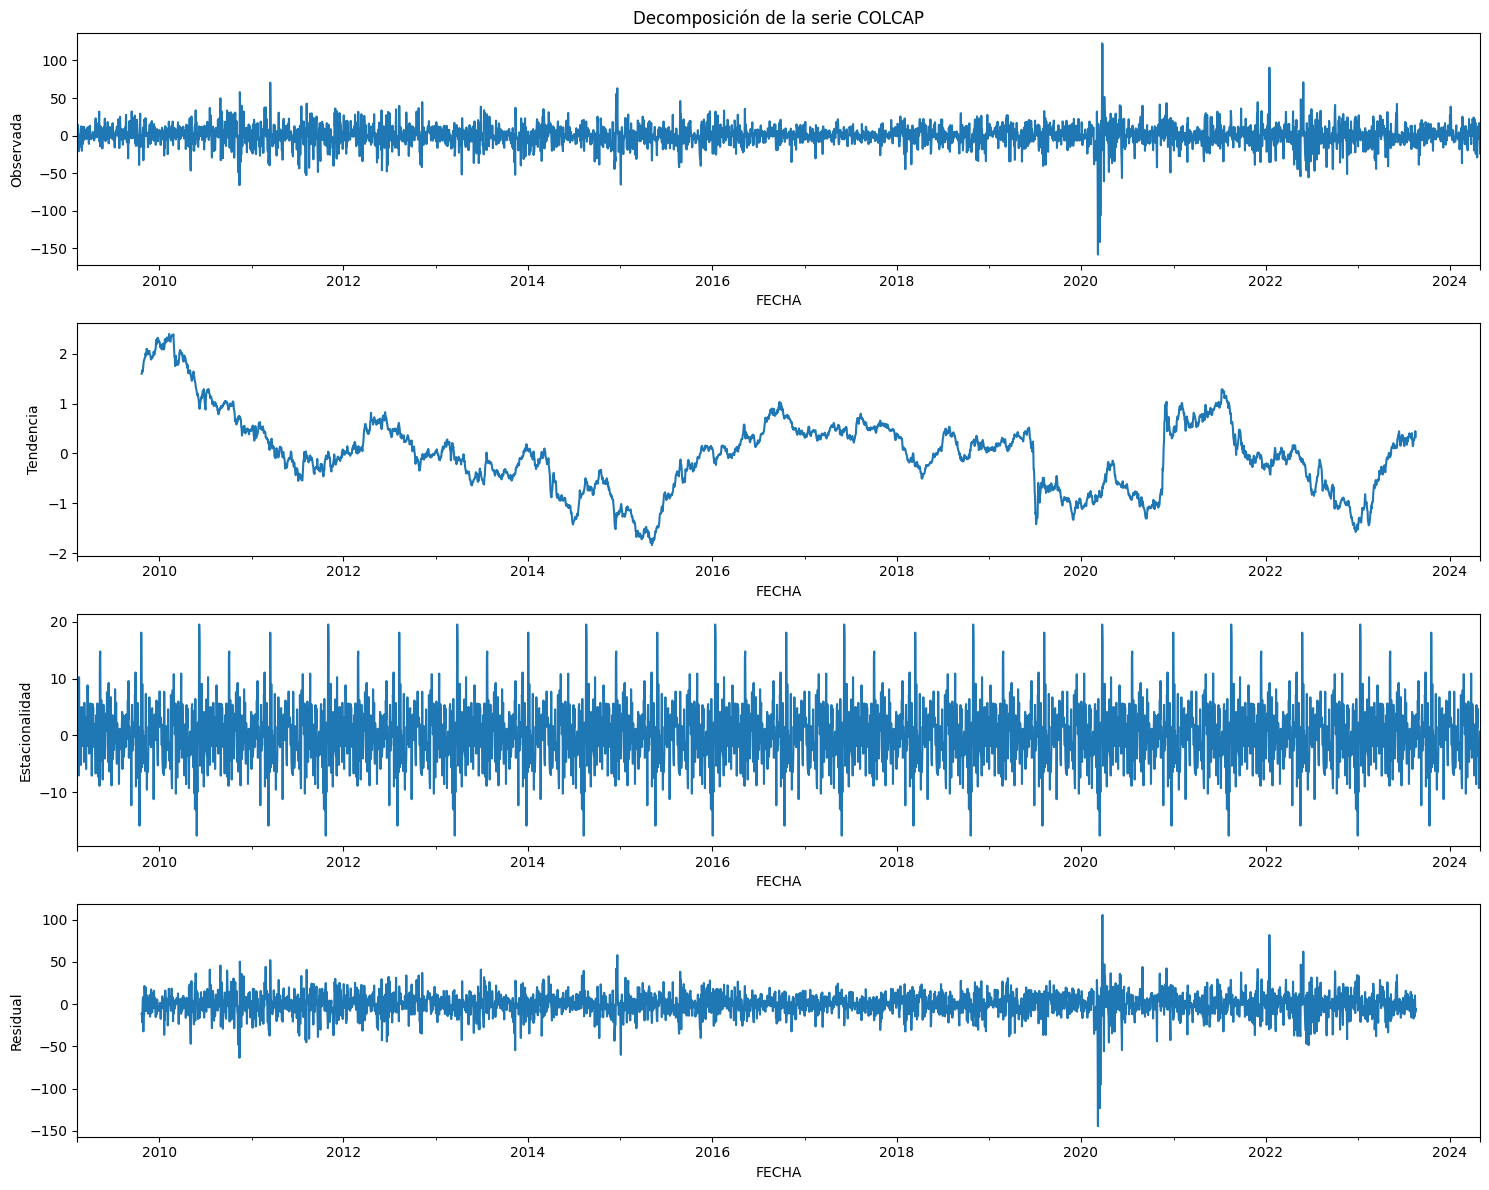

Decomponiendo la serie: EMBI


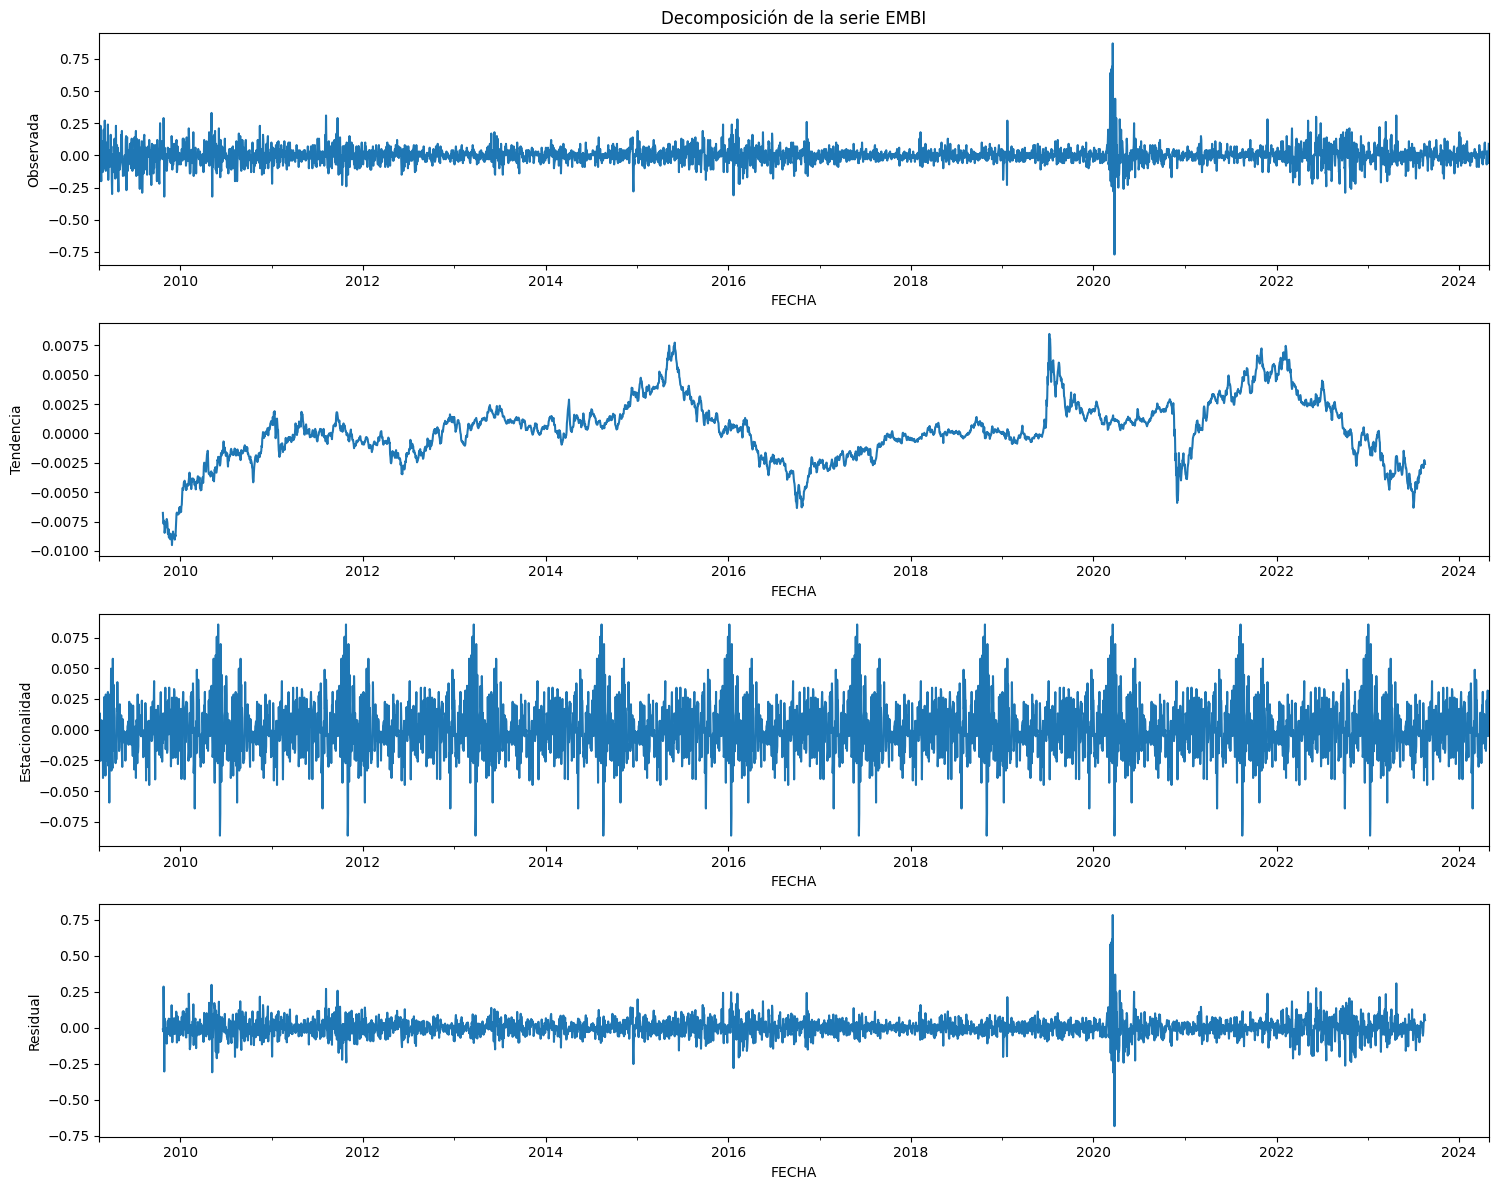

Decomponiendo la serie: DOLAR


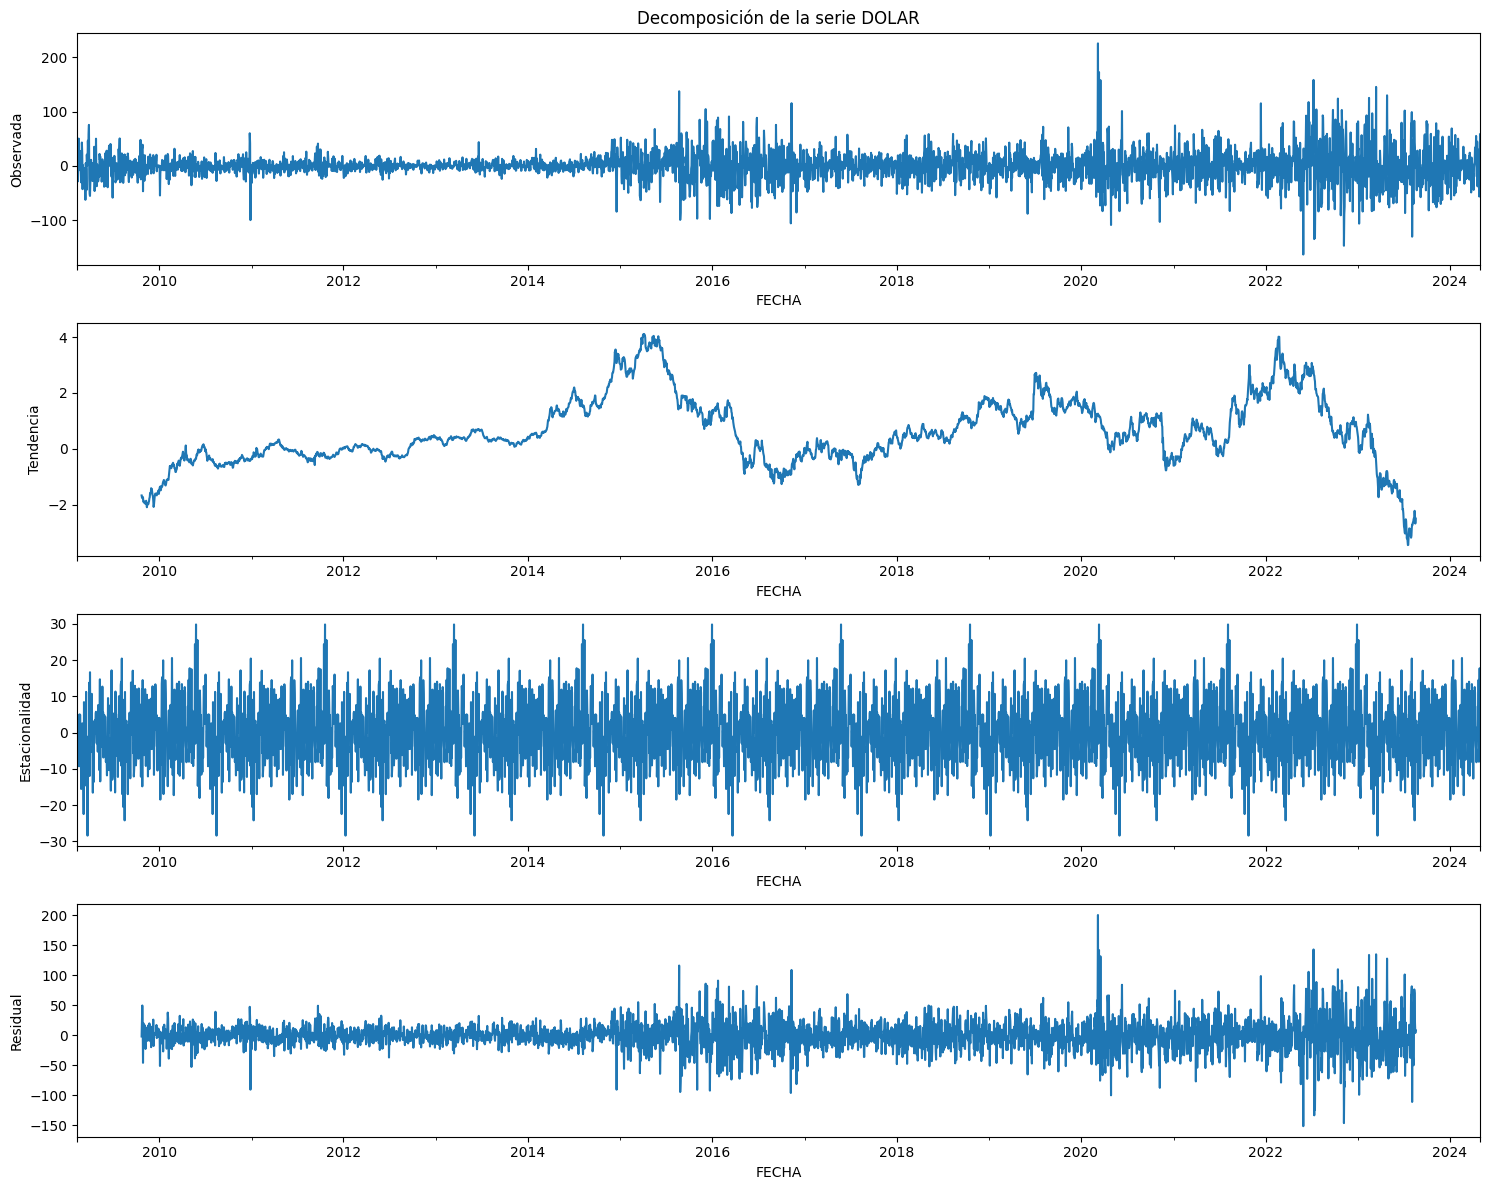

Decomponiendo la serie: CIB


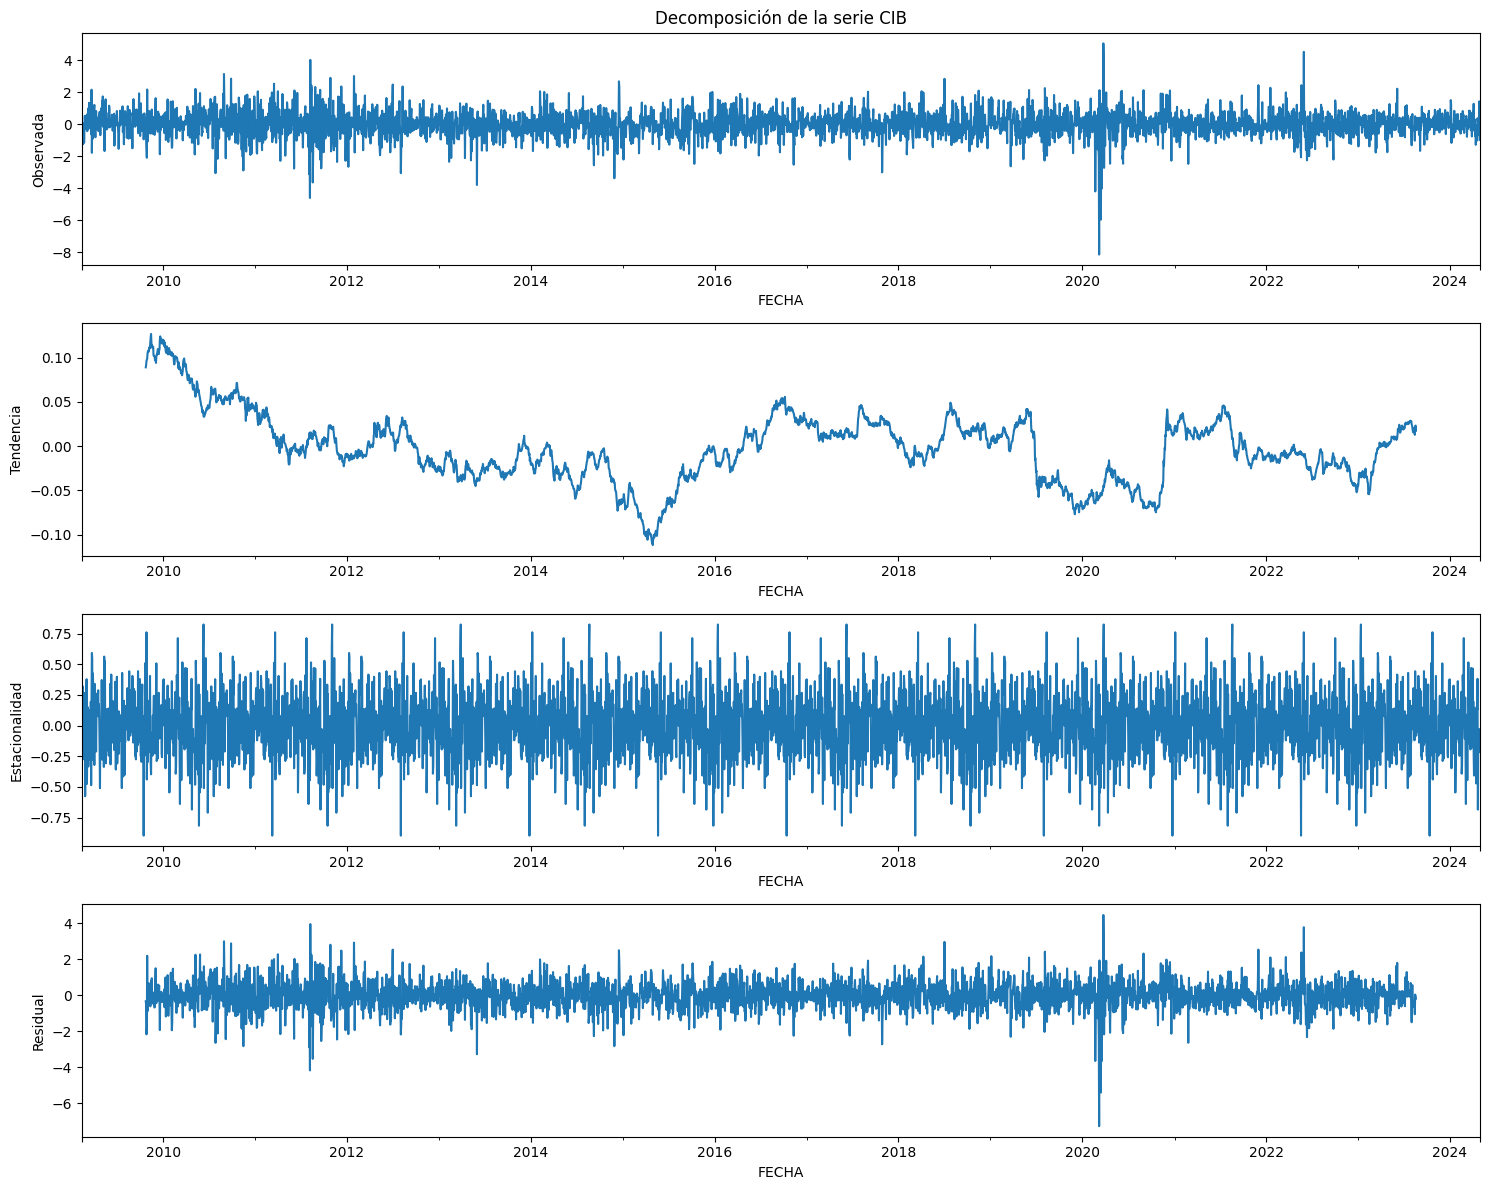

Decomponiendo la serie: FTSE COLOMBIA


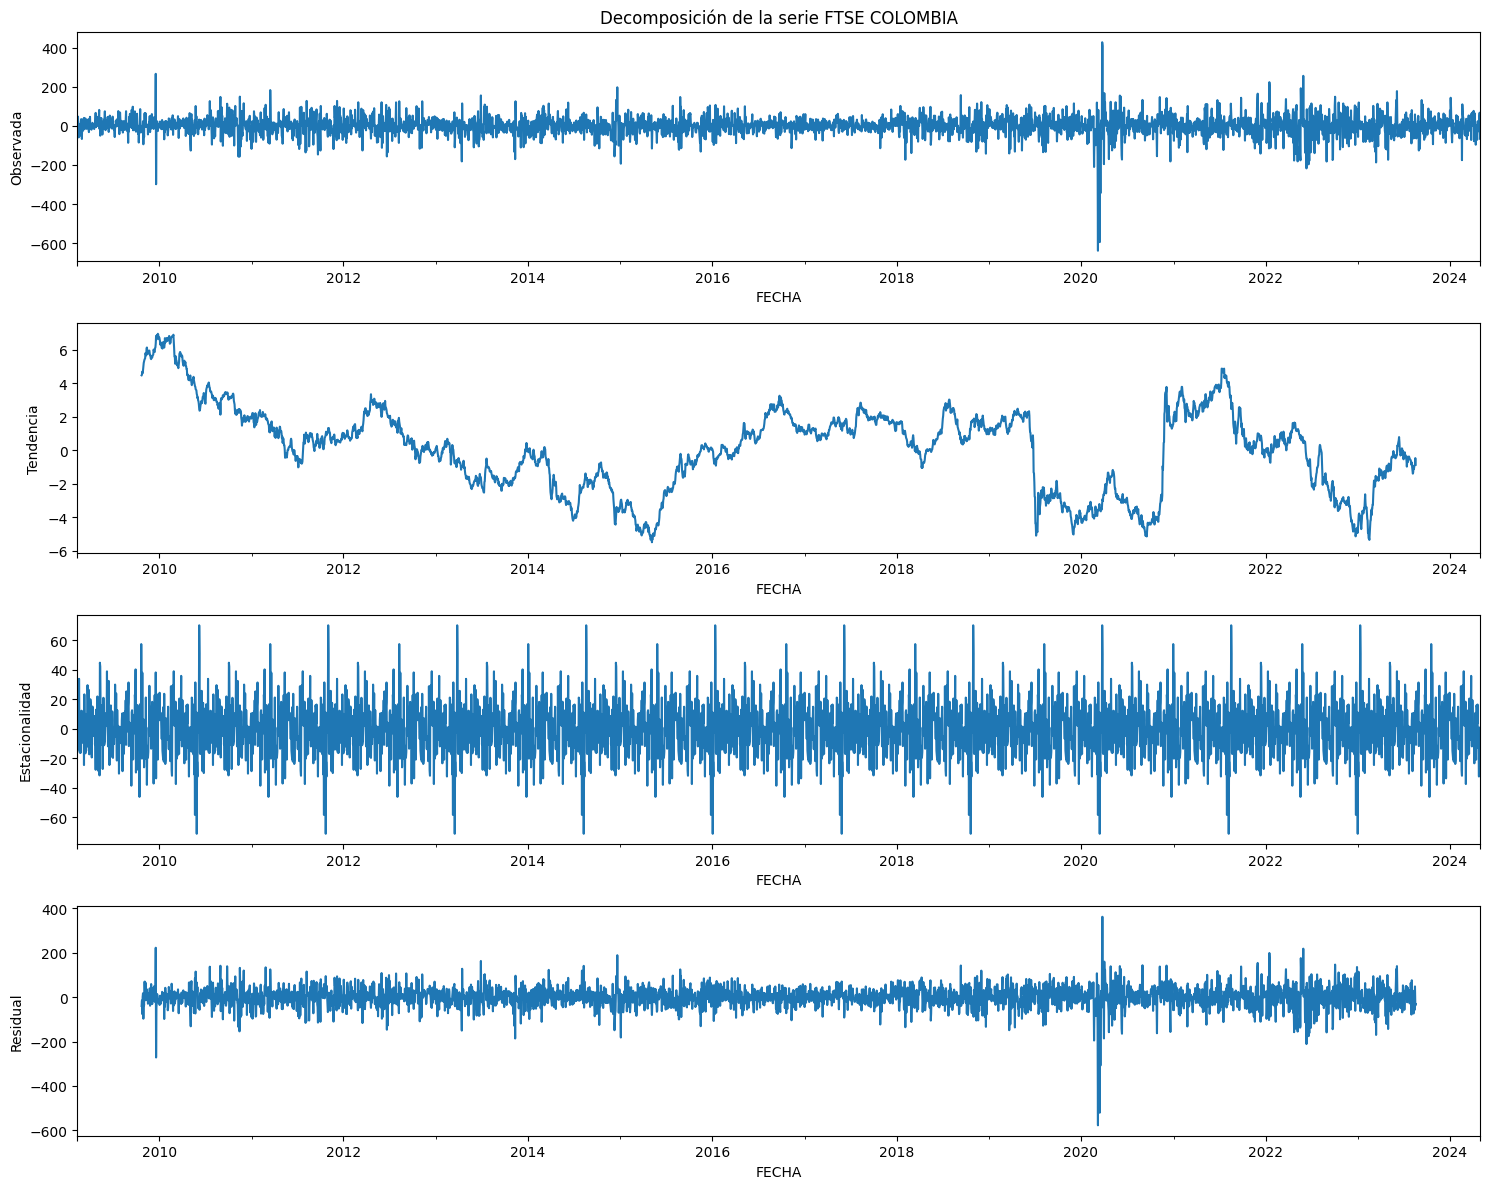

Decomponiendo la serie: EMM


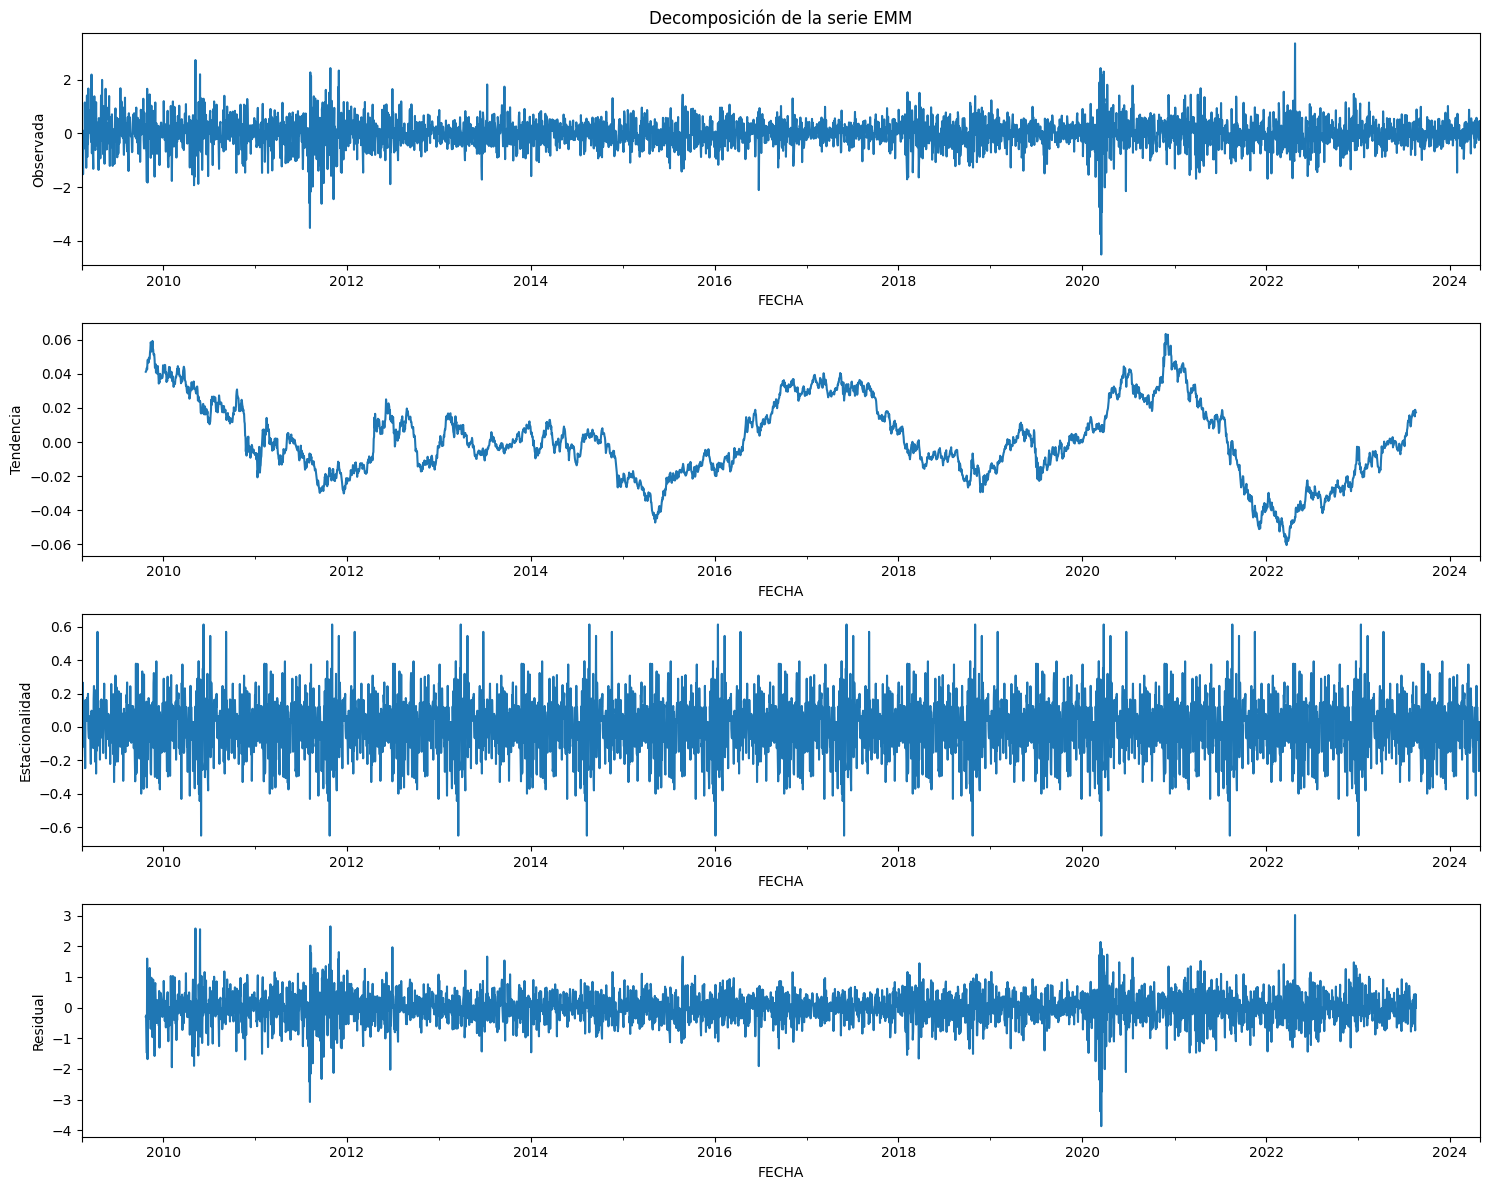

Decomponiendo la serie: BRENT


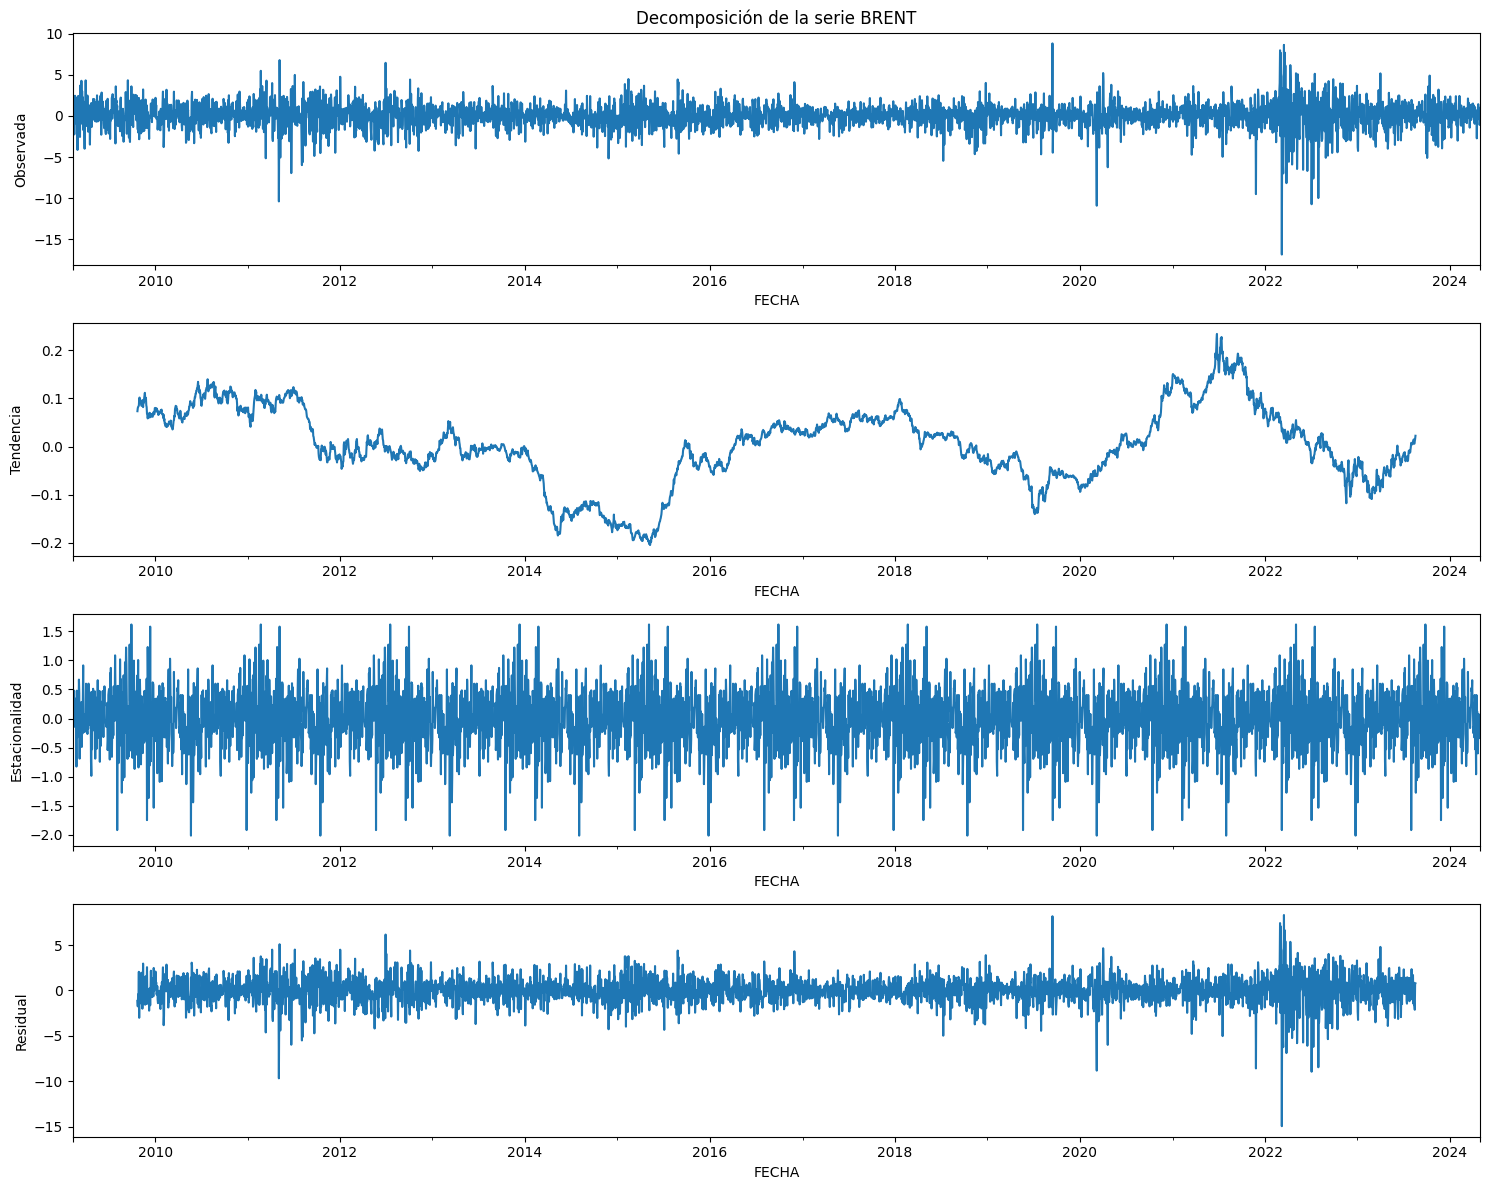

Decomponiendo la serie: GXG


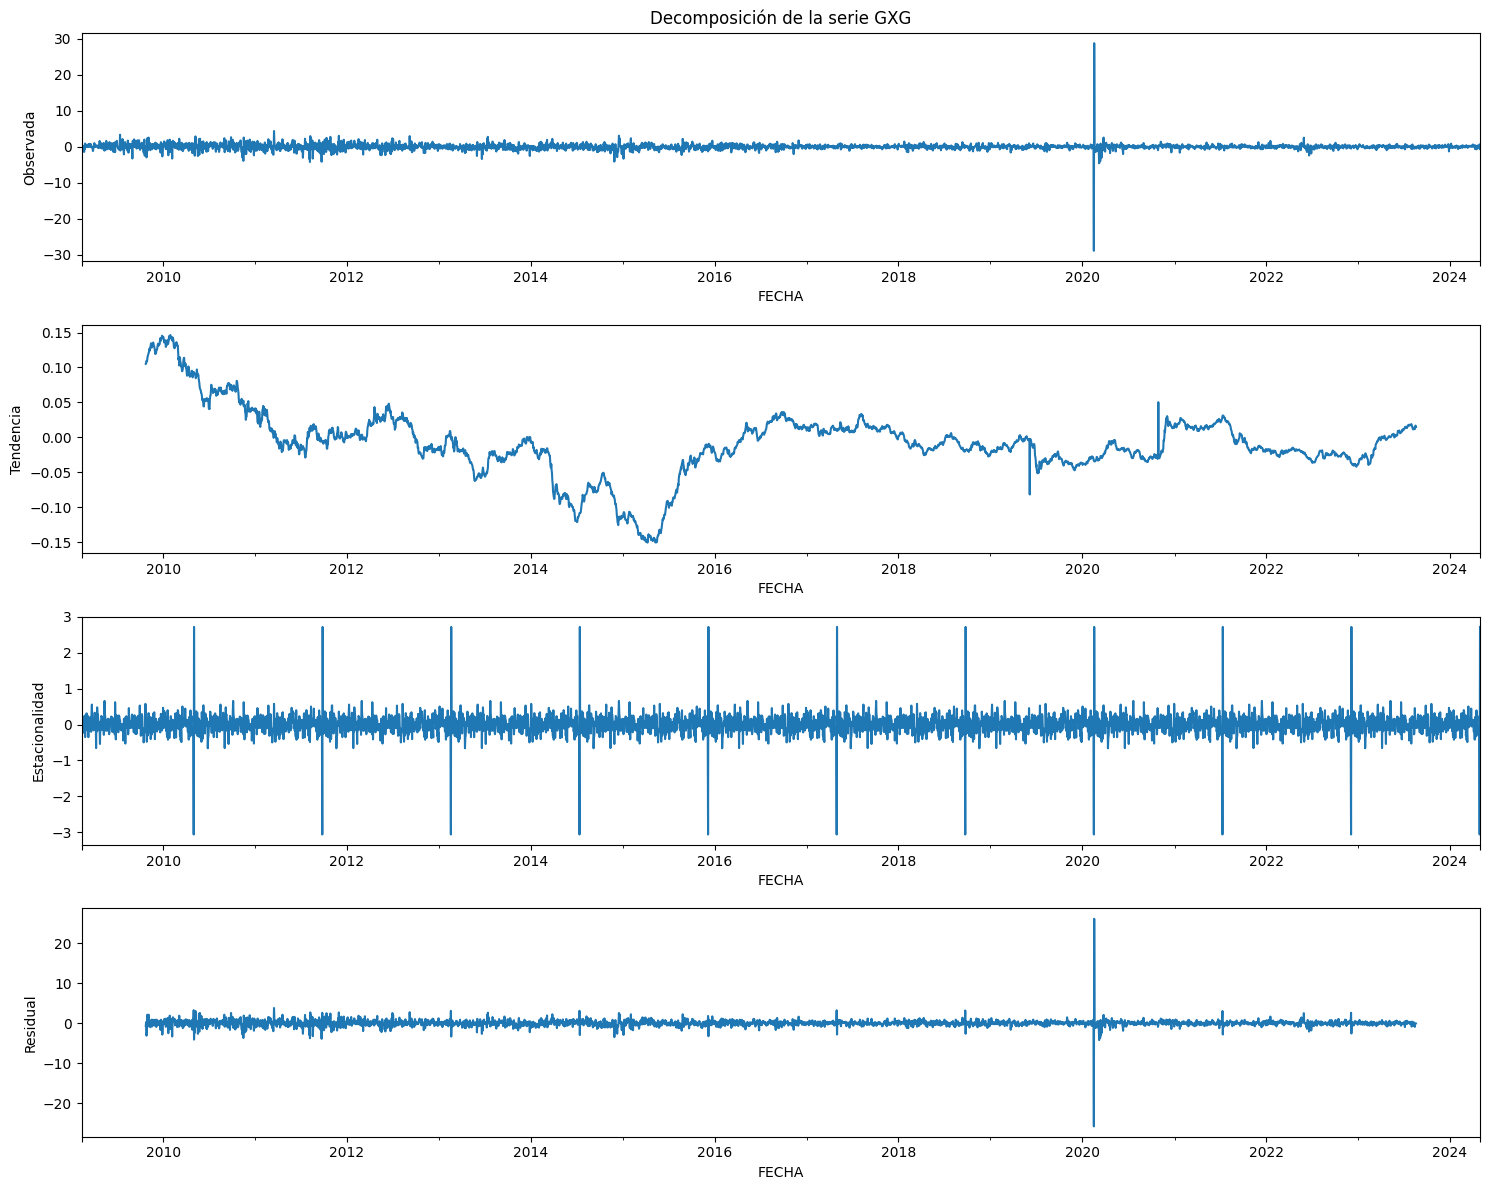

Decomponiendo la serie: ILF


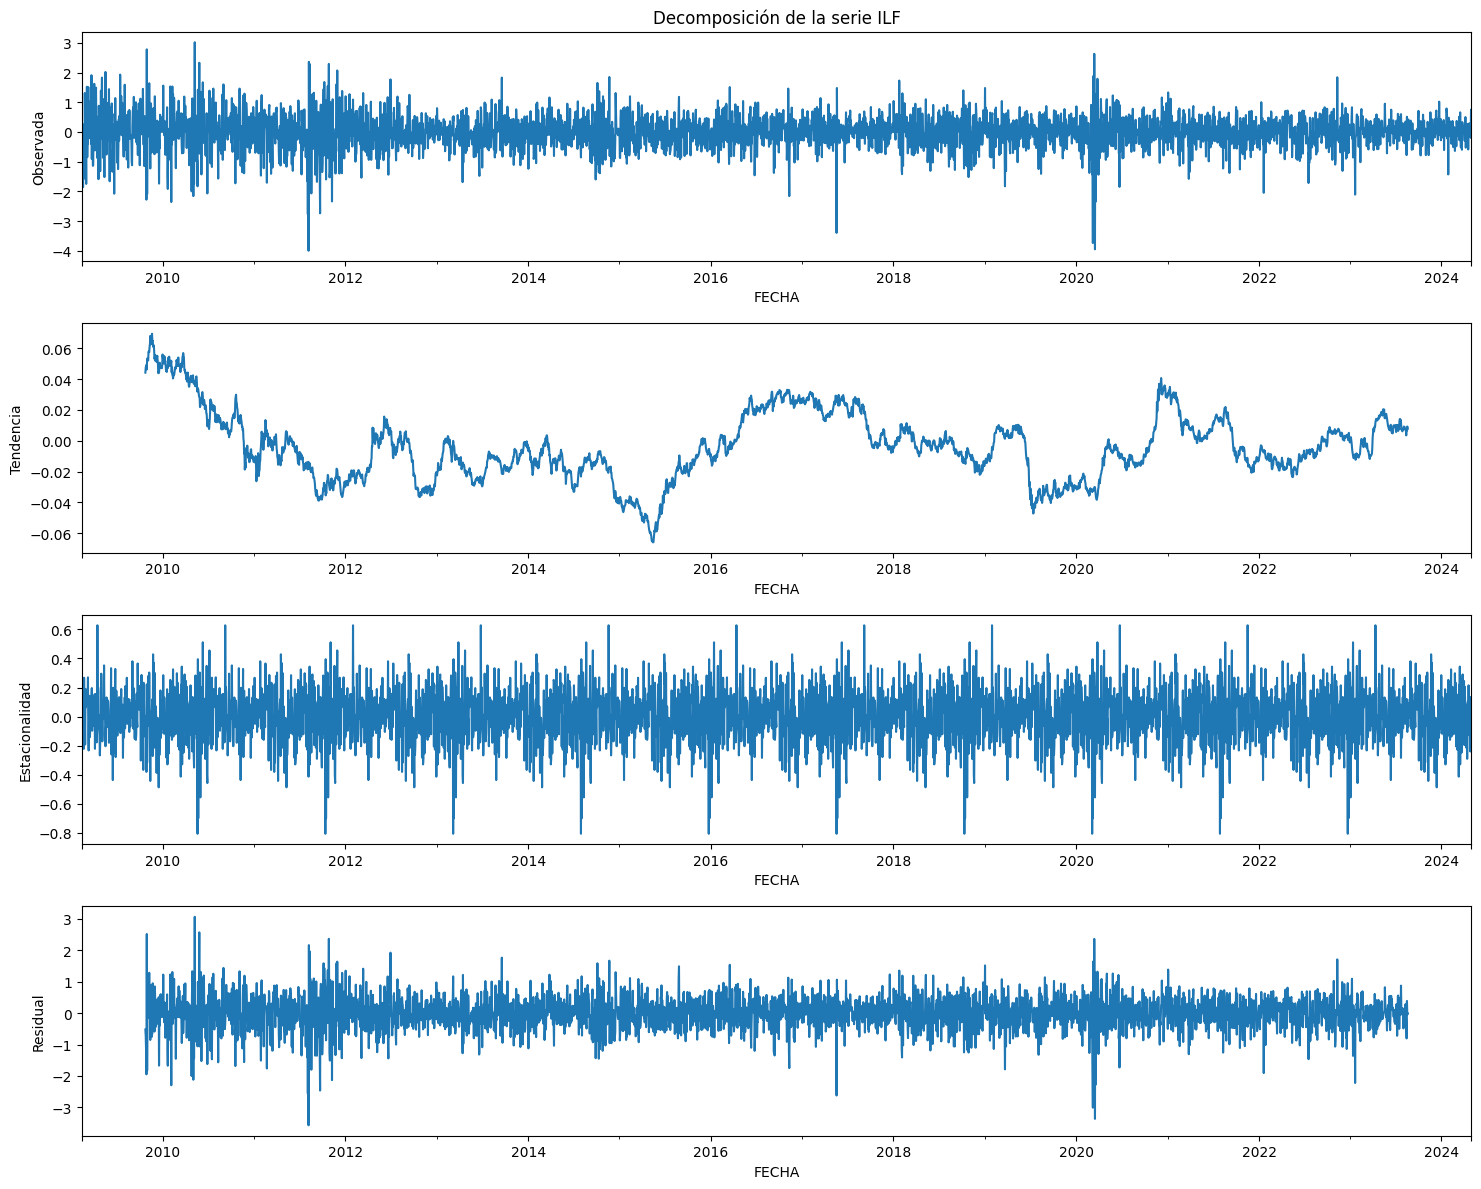

Decomponiendo la serie: TASA_INTERES_PM


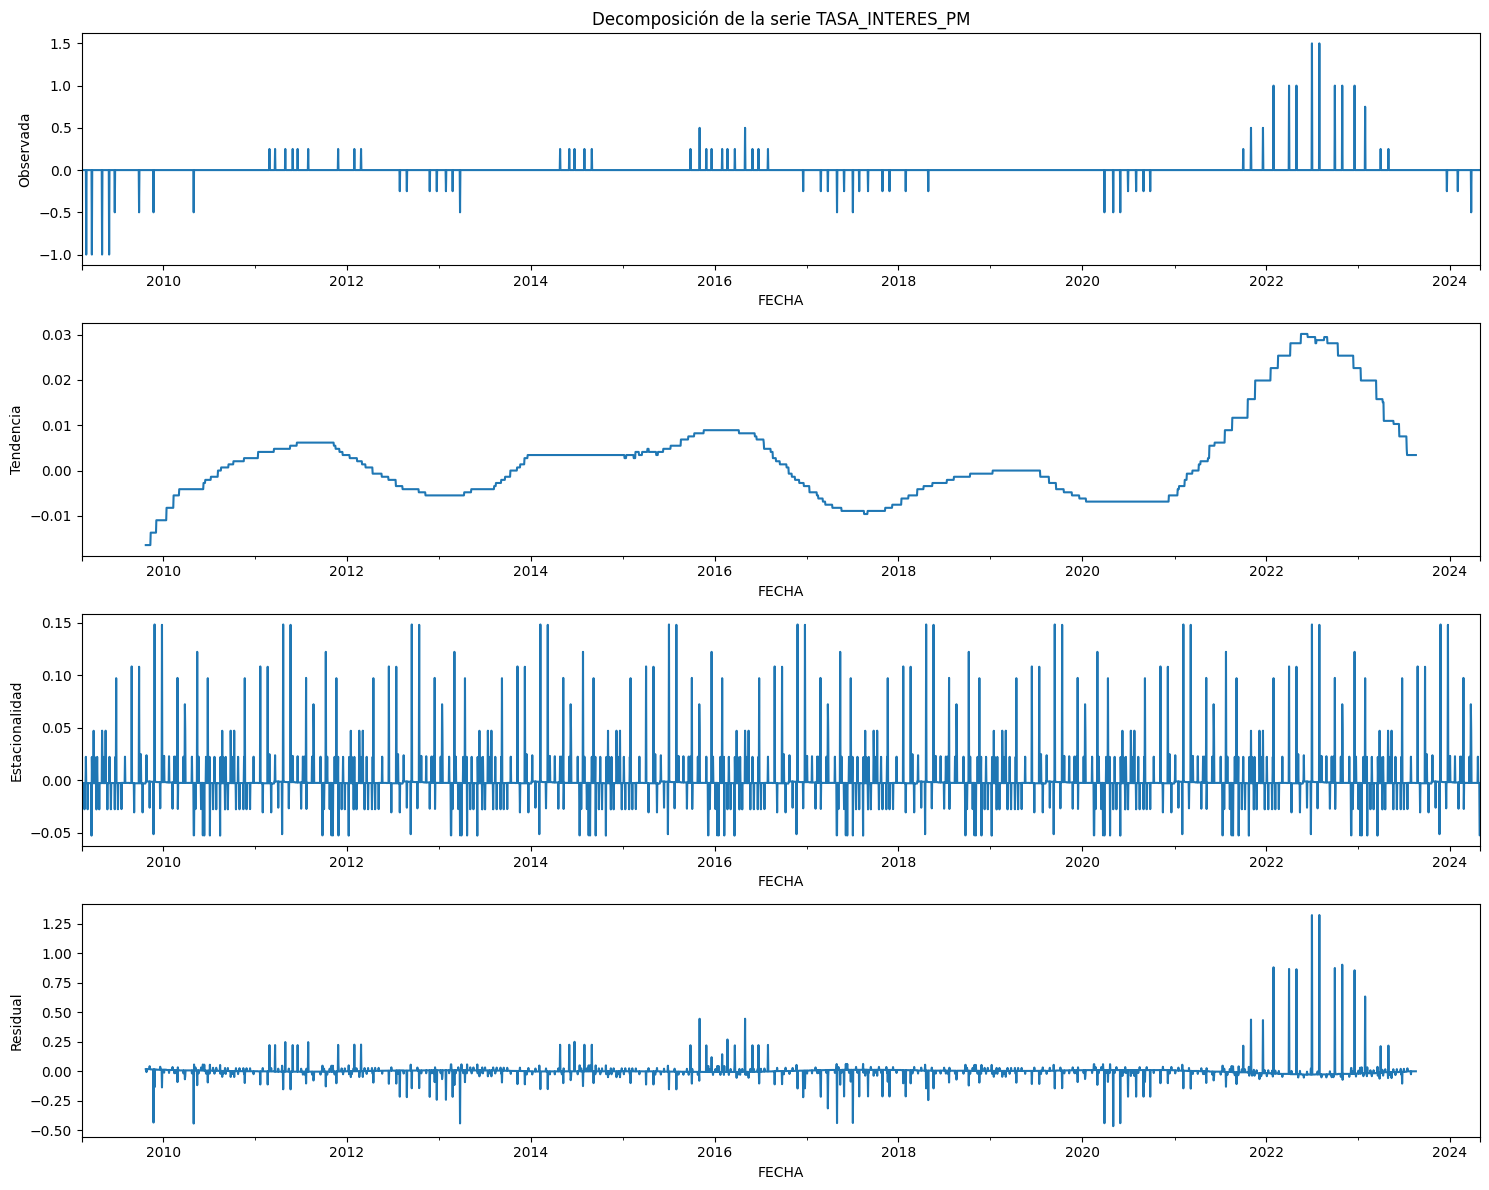

In [ ]:
# Aplicar descomposición a cada una de las series

decompositions = {}
for series_name in df_estacionarias.columns:
    print(f'Decomponiendo la serie: {series_name}')
    decompositions[series_name] = decompose_series(df_estacionarias[series_name], series_name)


# Análisis de Autocorrelación y Autocorrelación parcial

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Analizando la serie: COLCAP


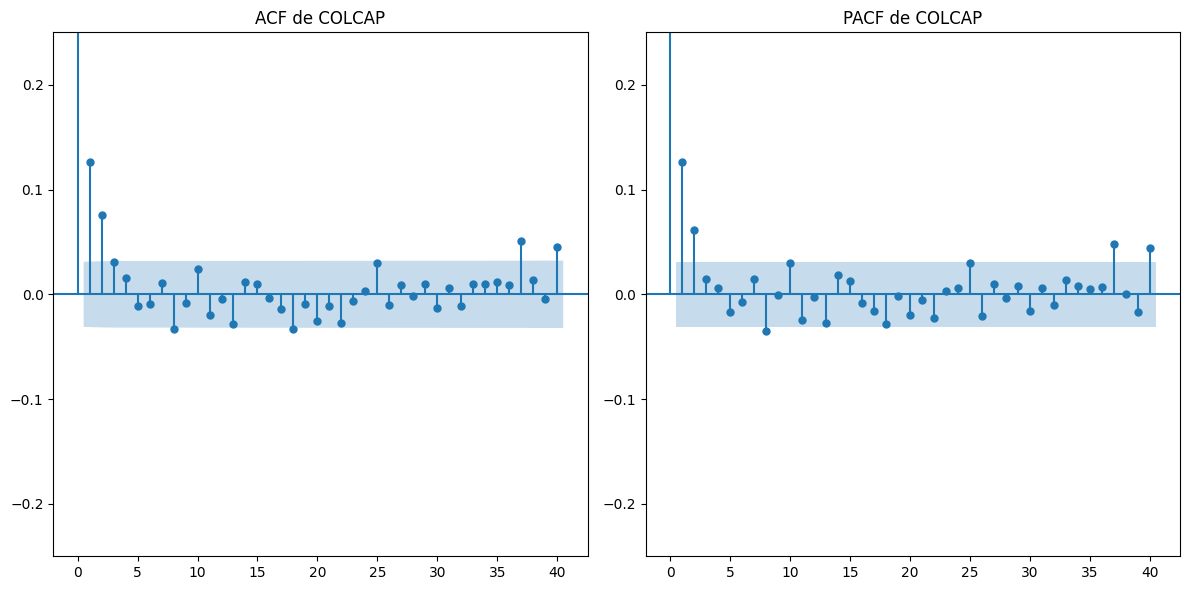

Analizando la serie: EMBI


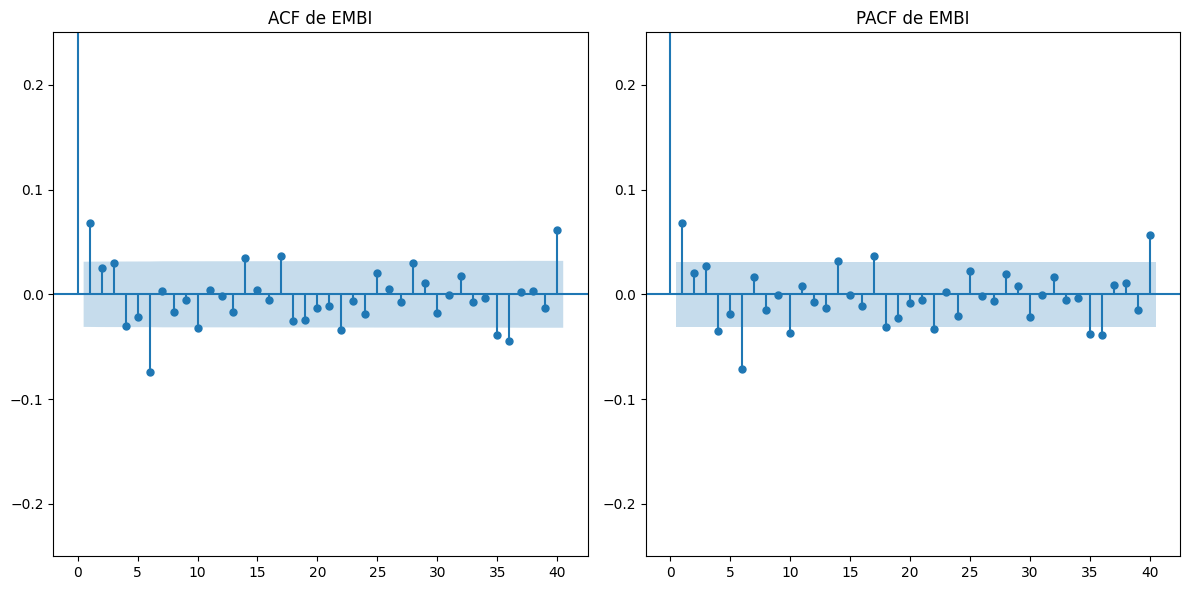

Analizando la serie: DOLAR


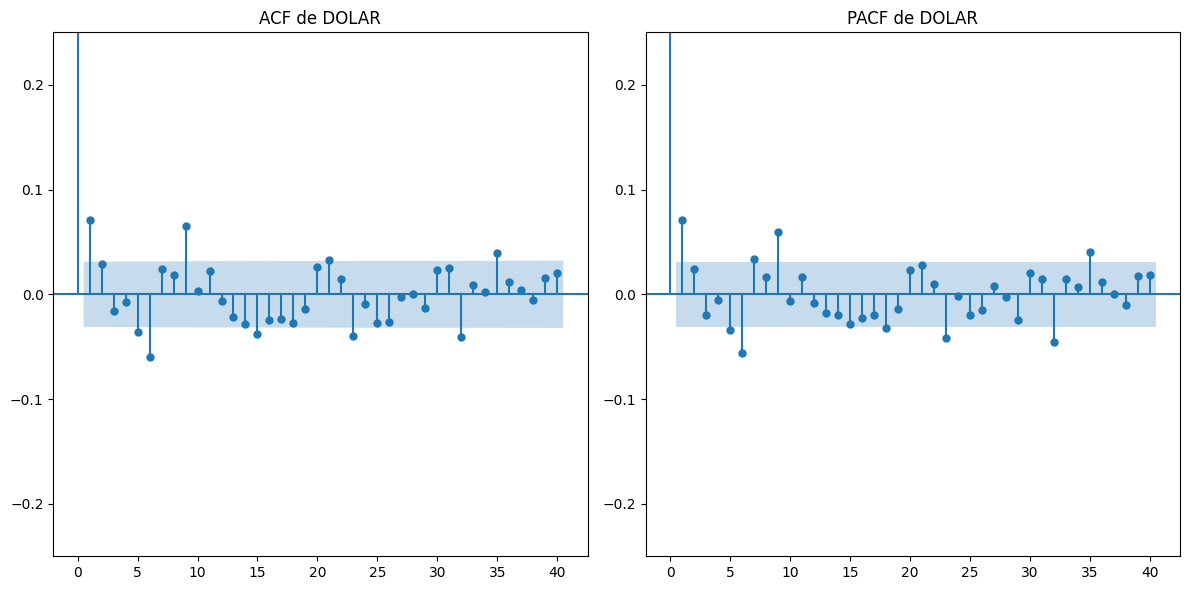

Analizando la serie: CIB


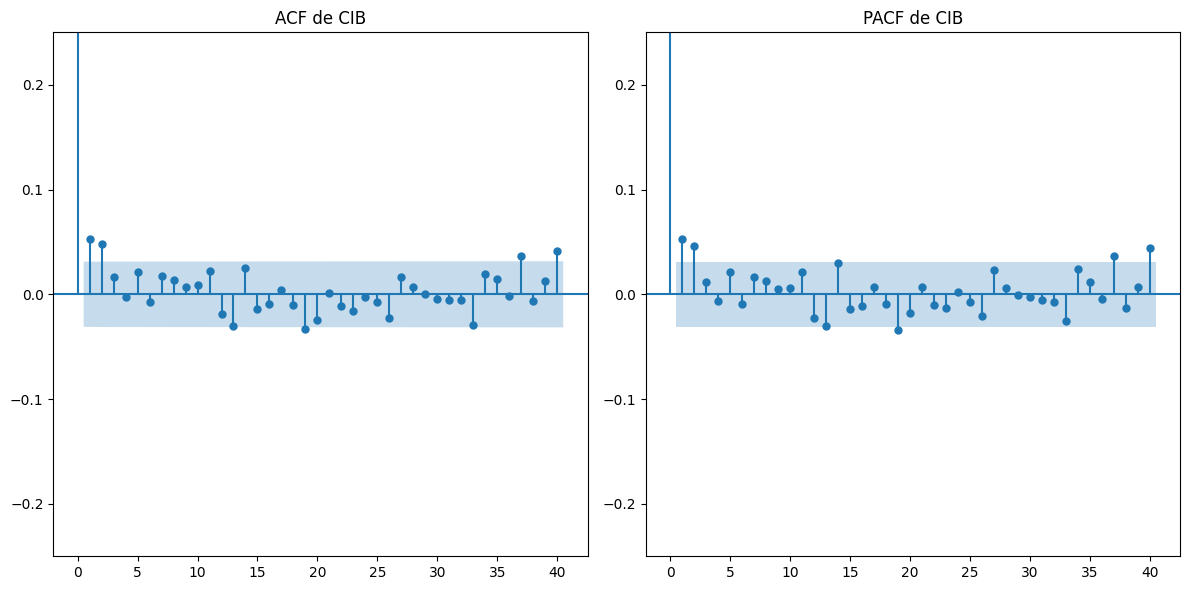

Analizando la serie: FTSE COLOMBIA


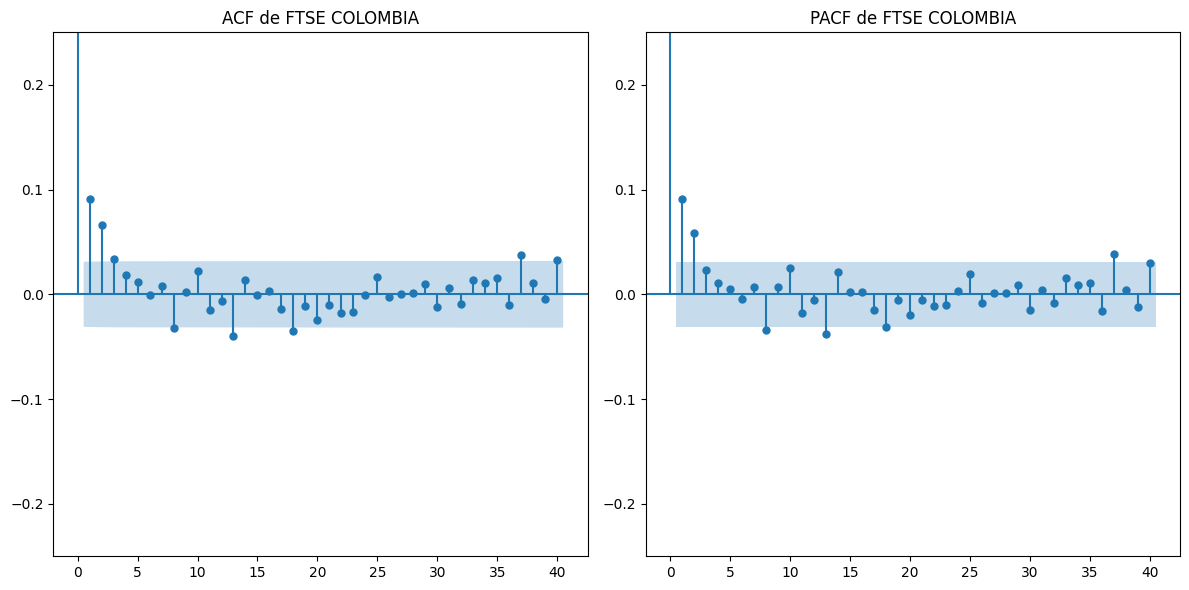

Analizando la serie: EMM


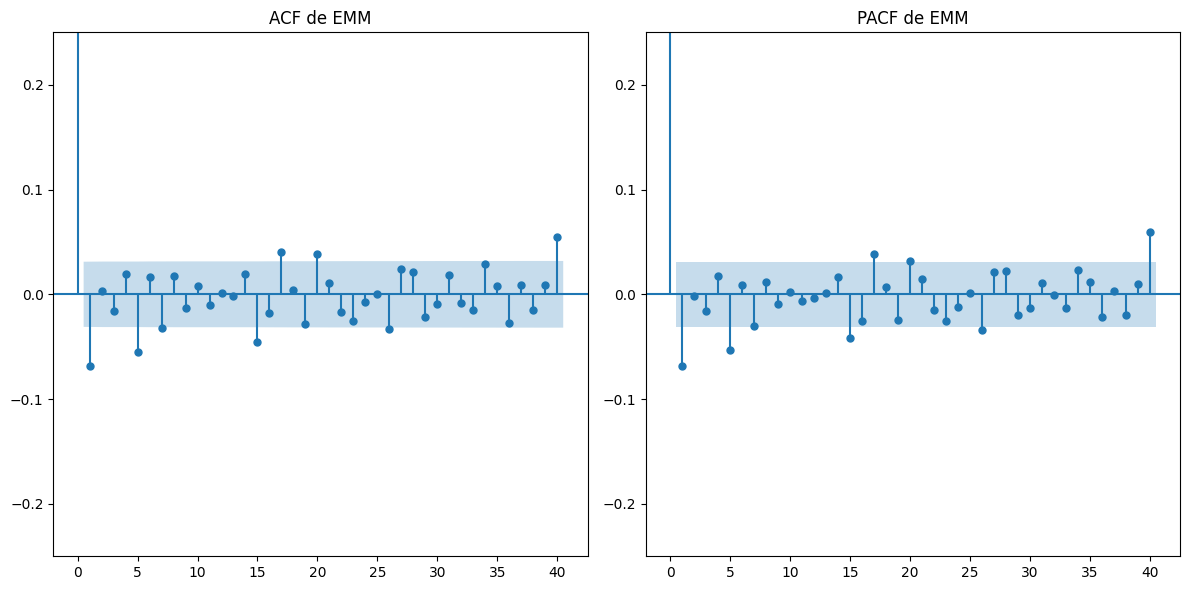

Analizando la serie: BRENT


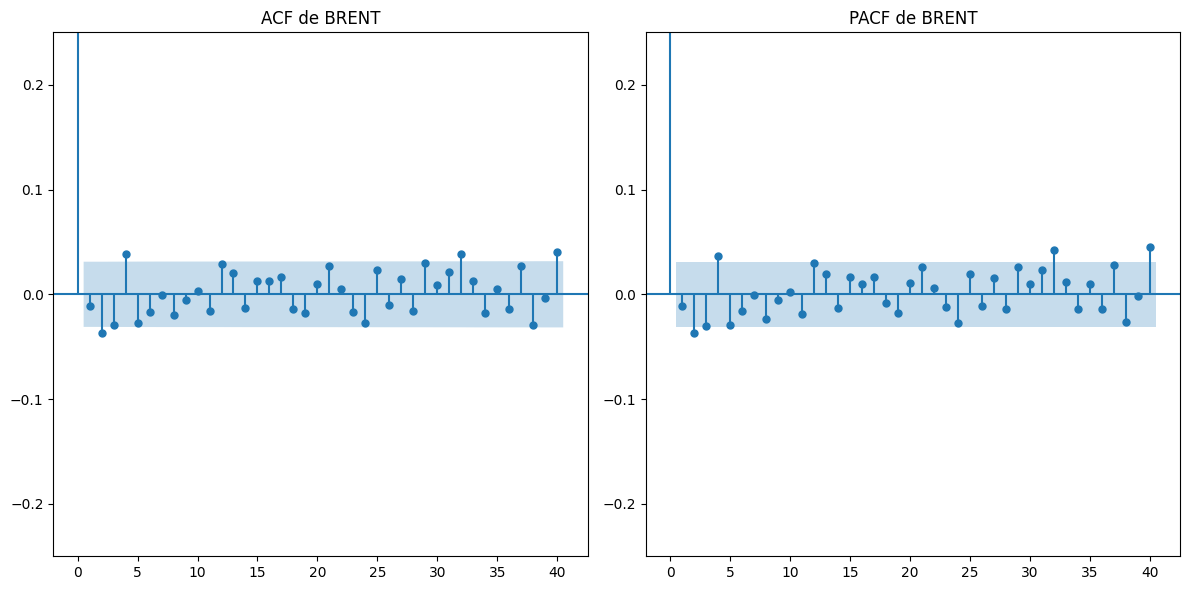

Analizando la serie: GXG


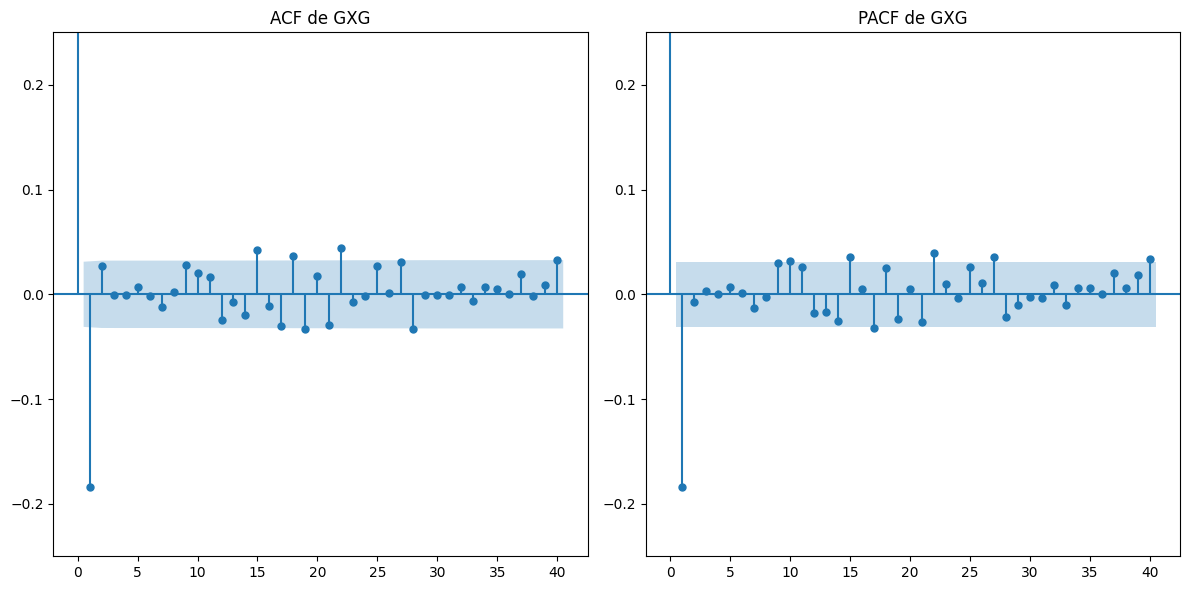

Analizando la serie: ILF


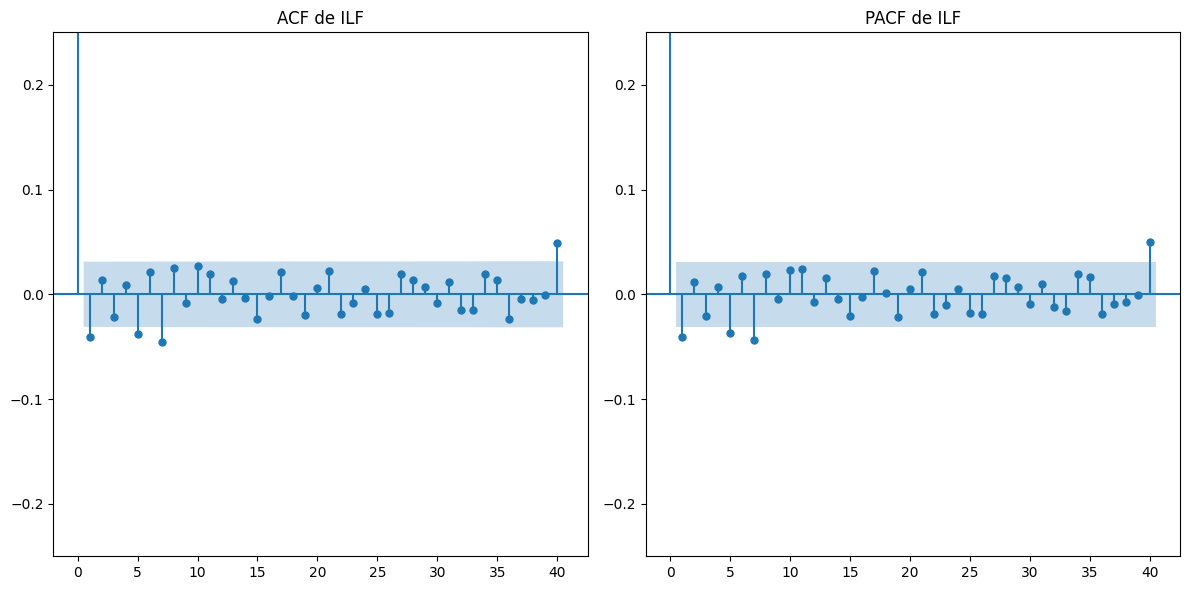

Analizando la serie: TASA_INTERES_PM


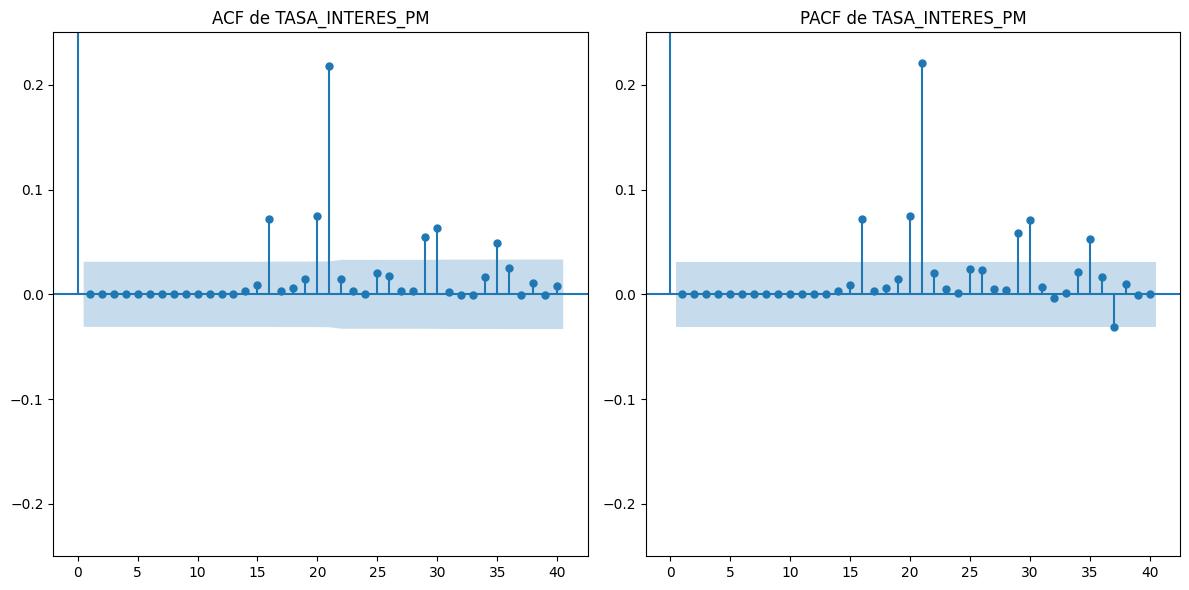

In [ ]:
# Series que necesitan análisis de ACF y PACF
series_to_analyze = df_estacionarias.columns

# Función para graficar ACF y PACF
def plot_acf_pacf(series, series_name, lags=40):
    plt.figure(figsize=(12, 6))

    # Gráfico de ACF
    plt.subplot(121)
    plot_acf(series, lags=lags, ax=plt.gca())
    plt.ylim(-0.25, 0.25)
    plt.title(f'ACF de {series_name}')

    # Gráfico de PACF
    plt.subplot(122)
    plot_pacf(series, lags=lags, ax=plt.gca(), method='ywm')
    plt.ylim(-0.25, 0.25)
    plt.title(f'PACF de {series_name}')


    plt.tight_layout()
    plt.show()

# Aplicar el análisis ACF y PACF a cada serie diferenciada
for series_name in series_to_analyze:
    print(f'Analizando la serie: {series_name}')
    series = df_estacionarias[series_name]
    plot_acf_pacf(series, series_name)

# Modelado ARIMA

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
df_estacionarias.head()

COLCAP  EMBI  DOLAR   CIB  FTSE COLOMBIA   EMM  BRENT   GXG   ILF  \
FECHA                                                                           
2009-02-11   -5.45  0.14  38.20 -0.72         -14.24  0.70  -0.33  0.00  0.16   
2009-02-12   -9.00  0.08 -12.20 -0.15         -33.38 -0.15   0.37  0.00  0.13   
2009-02-13   14.14 -0.20 -28.50  0.10          47.39  0.12   0.16  0.48  0.28   
2009-02-16   -0.86  0.00  13.25  0.00          -9.28  0.00  -1.53  0.00  0.00   
2009-02-17  -20.90  0.23  50.25 -1.24         -58.95 -1.52  -2.25 -1.14 -1.86   

            TASA_INTERES_PM  
FECHA                        
2009-02-11              0.0  
2009-02-12              0.0  
2009-02-13              0.0  
2009-02-16              0.0  
2009-02-17              0.0

## ARIMA

In [ ]:
# Seleccionar la serie COLCAP ya diferenciada
colcap_diff = df_estacionarias['COLCAP']

# Identificación de los posibles valores de p y q
p_values = range(0, 4)
q_values = range(0, 4)

# Evaluar combinaciones de p, d, q utilizando AIC
best_aic = np.inf
best_order = None
best_mdl = None

for p in p_values:
    for q in q_values:
        try:
            tmp_mdl = ARIMA(colcap_diff, order=(p, 0, q)).fit()
            tmp_aic = tmp_mdl.aic
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (p, 0, q)
                best_mdl = tmp_mdl
        except Exception as e:
            continue

print(f'El mejor modelo ARIMA encontrado es: ARIMA{best_order} con AIC={best_aic}')
print(best_mdl.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


El mejor modelo ARIMA encontrado es: ARIMA(2, 0, 0) con AIC=32405.78907245218
                               SARIMAX Results                                
Dep. Variable:                 COLCAP   No. Observations:                 3970
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -16198.895
Date:                Mon, 01 Jul 2024   AIC                          32405.789
Time:                        22:16:13   BIC                          32430.935
Sample:                    02-11-2009   HQIC                         32414.706
                         - 04-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1203      0.284      0.423      0.672      -0.437       0.678
ar.L1          0.1185      0.009     13.480      0.00

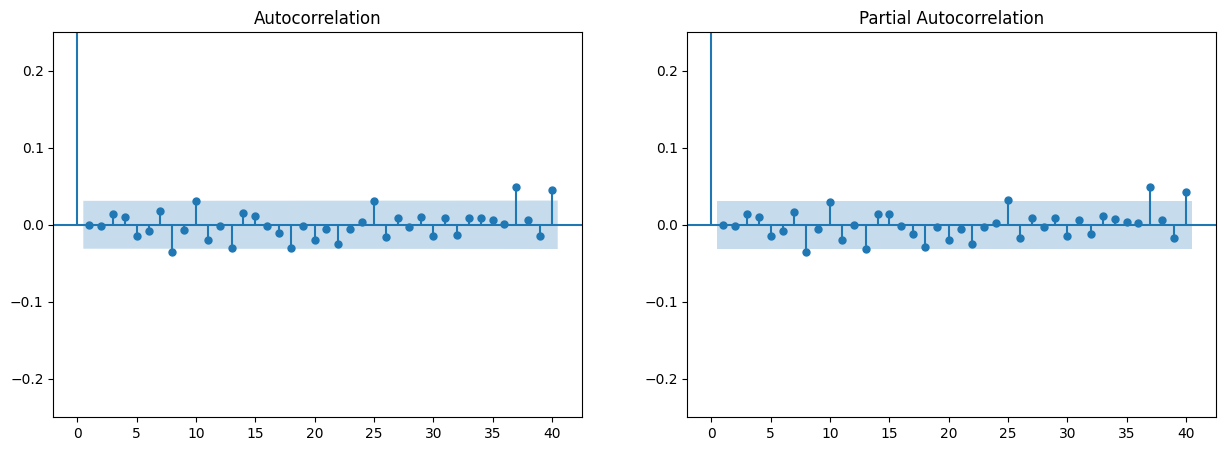

In [ ]:
# Diagnóstico de residuos
residuals = best_mdl.resid
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig = sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax[0])
ax[0].set_ylim(-0.25, 0.25)  # Ajustar límites del eje y
fig = sm.graphics.tsa.plot_pacf(residuals, lags=40, ax=ax[1])
ax[1].set_ylim(-0.25, 0.25)  # Ajustar límites del eje y
plt.show()

## Autoarima

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=32405.746, Time=5.53 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=32478.627, Time=0.31 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=32416.803, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=32424.275, Time=0.94 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=32405.111, Time=1.23 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=32407.067, Time=1.73 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=32404.160, Time=1.64 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=32405.156, Time=3.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=32403.973, Time=0.72 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=32405.158, Time=0.85 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=32407.120, Time=3.56 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=32405.789, Time=1.25 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 21.164 seconds
                               SARIMAX Results                             

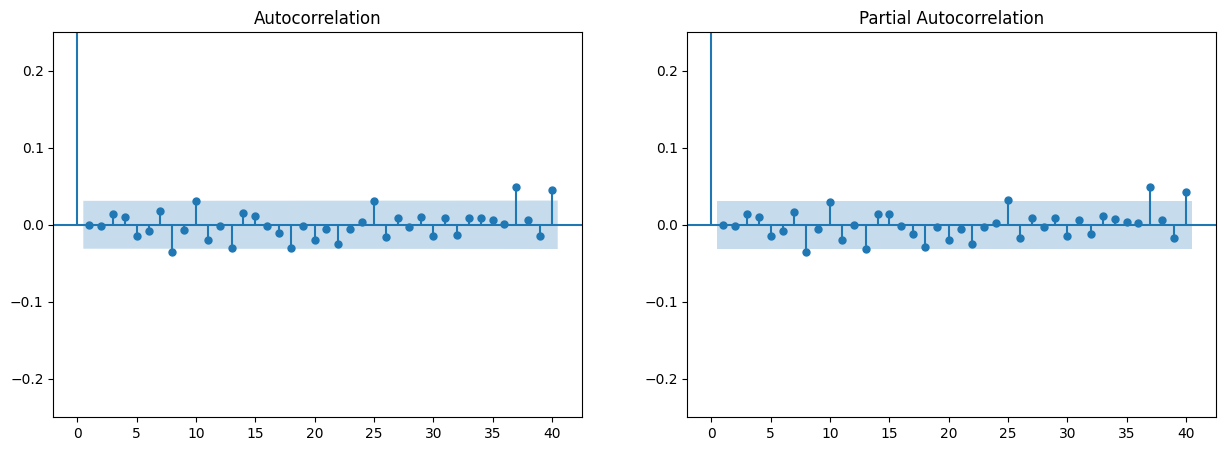

In [ ]:
# Seleccionar la serie COLCAP ya diferenciada
colcap_diff = df_estacionarias['COLCAP']

# Aplicar AUTOARIMA
model = auto_arima(colcap_diff, seasonal=False, stepwise=True, trace=True)

# Resumen del modelo seleccionado
print(model.summary())

# Diagnóstico de residuos
residuals = model.resid()
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig = sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax[0])
ax[0].set_ylim(-0.25, 0.25)  # Ajustar límites del eje y
fig = sm.graphics.tsa.plot_pacf(residuals, lags=40, ax=ax[1])
ax[1].set_ylim(-0.25, 0.25)  # Ajustar límites del eje y
plt.show()

## Predicción con ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
# df serie orginal
df.head()

COLCAP  EMBI    DOLAR    CIB  FTSE COLOMBIA    EMM  BRENT    GXG  \
FECHA                                                                          
2009-02-10  879.72  4.75  2501.00  19.72        2452.51  23.17  44.61  30.00   
2009-02-11  874.27  4.89  2539.20  19.00        2438.27  23.87  44.28  30.00   
2009-02-12  865.27  4.97  2527.00  18.85        2404.89  23.72  44.65  30.00   
2009-02-13  879.41  4.77  2498.50  18.95        2452.28  23.84  44.81  30.48   
2009-02-16  878.55  4.77  2511.75  18.95        2443.00  23.84  43.28  30.48   

              ILF  TASA_INTERES_PM  
FECHA                               
2009-02-10  26.39              9.0  
2009-02-11  26.55              9.0  
2009-02-12  26.68              9.0  
2009-02-13  26.96              9.0  
2009-02-16  26.96              9.0

In [ ]:
# Seleccionar la serie COLCAP ya diferenciada
colcap_diff = df_estacionarias['COLCAP']

# Dividir los datos en entrenamiento y prueba
train_size = int(len(colcap_diff) * 0.8)
train, test = colcap_diff[:train_size], colcap_diff[train_size:]

# Ajustar el modelo ARIMA(2,0,0) a los datos de entrenamiento
model = ARIMA(train, order=(2, 0, 0))
model_fit = model.fit()

# Realizar predicciones en el conjunto de prueba
start = len(train)
end = len(train) + len(test) - 1
predictions_diff = model_fit.predict(start=start, end=end, dynamic=False)

# Revertir la diferenciación utilizando los valores de la serie original
colcap_original = df['COLCAP']

# Crear una serie vacía para las predicciones invertidas
predictions = pd.Series(index=test.index, dtype=float)

# Revertir la diferenciación utilizando los valores de la serie original
for i in range(len(predictions_diff)):
    if i == 0:
        predictions.iloc[i] = colcap_original.iloc[train_size] + predictions_diff.iloc[i]
    else:
        predictions.iloc[i] = predictions.iloc[i - 1] + predictions_diff.iloc[i]

In [ ]:
# Evaluar el desempeño del modelo
mse = mean_squared_error(colcap_original[test.index], predictions)
print(f'Error cuadrático medio (MSE): {mse}')

Error cuadrático medio (MSE): 31611.794676889323


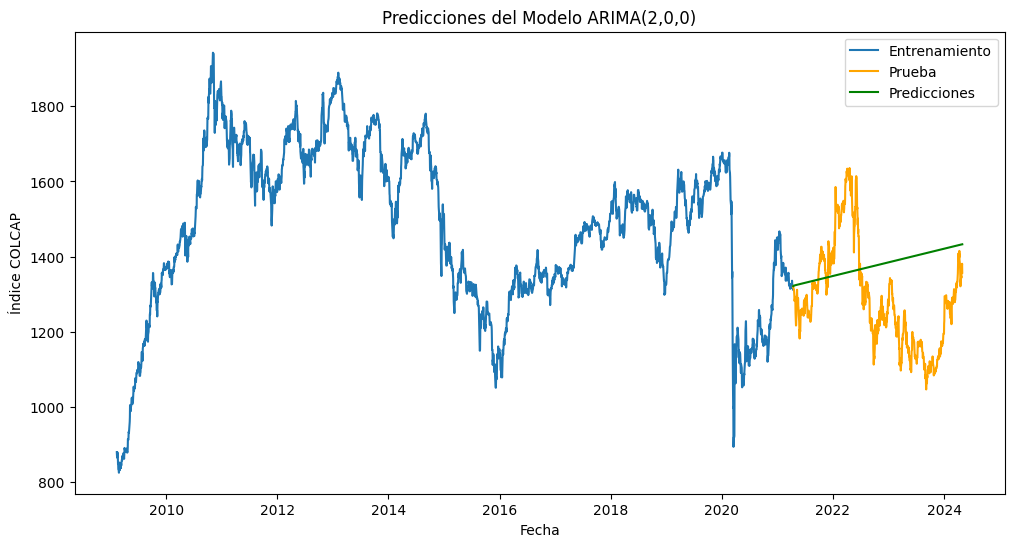

In [ ]:
# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(colcap_original.index[:train_size], colcap_original[:train_size], label='Entrenamiento')
plt.plot(colcap_original.index[train_size:], colcap_original[train_size:], label='Prueba', color='orange')
plt.plot(predictions.index, predictions, label='Predicciones', color='green')
plt.xlabel('Fecha')
plt.ylabel('Índice COLCAP')
plt.title('Predicciones del Modelo ARIMA(2,0,0)')
plt.legend()
plt.show()

## SARIMAX

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from itertools import combinations

In [ ]:
df_estacionarias.columns

Index(['COLCAP', 'EMBI', 'DOLAR', 'CIB', 'FTSE COLOMBIA', 'EMM', 'BRENT',
       'GXG', 'ILF', 'TASA_INTERES_PM'],
      dtype='object')

In [ ]:
# Seleccionar la serie COLCAP ya diferenciada
colcap_diff = df_estacionarias['COLCAP']

# Definir las variables exógenas a considerar
exogenous_vars = ['EMBI', 'DOLAR', 'CIB', 'FTSE COLOMBIA', 'EMM', 'BRENT', 'GXG', 'ILF']

# Dividir los datos en entrenamiento y prueba
train_size = int(len(colcap_diff) * 0.8)
train_diff, test_diff = colcap_diff[:train_size], colcap_diff[train_size:]
train_exog, test_exog = df_estacionarias[exogenous_vars][:train_size], df_estacionarias[exogenous_vars][train_size:]

# Combinaciones de al menos 4 variables exógenas
combinations_of_vars = [combo for combo in combinations(exogenous_vars, 4)]

# Evaluar combinaciones de variables exógenas utilizando AIC
best_aic = np.inf
best_order = None
best_model = None
best_vars = None

for combo in combinations_of_vars:
    try:
        model = SARIMAX(train_diff, order=(2, 0, 0), exog=train_exog[list(combo)])
        model_fit = model.fit(disp=False)
        aic = model_fit.aic
        if aic < best_aic:
            best_aic = aic
            best_order = (2, 0, 0)
            best_model = model_fit
            best_vars = combo
    except Exception as e:
        continue

print(f'El mejor modelo SARIMAX encontrado es: SARIMAX{best_order} con AIC={best_aic} y variables exógenas: {best_vars}')
print(best_model.summary())


El mejor modelo SARIMAX encontrado es: SARIMAX(2, 0, 0) con AIC=18310.239253510143 y variables exógenas: ('FTSE COLOMBIA', 'EMM', 'BRENT', 'GXG')
                               SARIMAX Results                                
Dep. Variable:                 COLCAP   No. Observations:                 3176
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -9148.120
Date:                Mon, 01 Jul 2024   AIC                          18310.239
Time:                        22:22:44   BIC                          18352.683
Sample:                    02-11-2009   HQIC                         18325.462
                         - 04-14-2021                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
FTSE COLOMBIA     0.2683      0.001    293.003      0.000 

In [ ]:
# Realizar predicciones en el conjunto de prueba
predictions_diff = best_model.predict(start=len(train_diff), end=len(train_diff) + len(test_diff) - 1, exog=test_exog[list(best_vars)])

# Invertir la diferenciación para obtener las predicciones en el contexto original
# Crear una serie vacía para las predicciones invertidas
predictions = pd.Series(index=test_diff.index, dtype=float)

# Revertir la diferenciación utilizando los valores de la serie original
for i in range(len(predictions_diff)):
    if i == 0:
        predictions.iloc[i] = df['COLCAP'].iloc[train_size] + predictions_diff.iloc[i]
    else:
        predictions.iloc[i] = predictions.iloc[i - 1] + predictions_diff.iloc[i]

# Evaluar el desempeño del modelo
mse = mean_squared_error(df['COLCAP'][test_diff.index], predictions)
print(f'Error cuadrático medio (MSE): {mse}')


Error cuadrático medio (MSE): 4229.376568163738


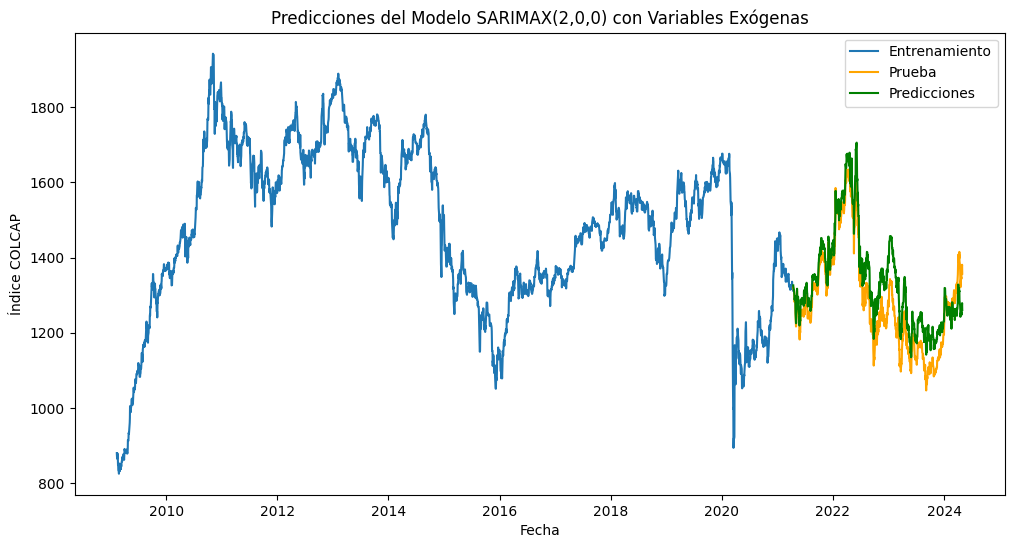

In [ ]:
# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(df['COLCAP'].index[:train_size], df['COLCAP'][:train_size], label='Entrenamiento')
plt.plot(df['COLCAP'].index[train_size:], df['COLCAP'][train_size:], label='Prueba', color='orange')
plt.plot(predictions.index, predictions, label='Predicciones', color='green')
plt.xlabel('Fecha')
plt.ylabel('Índice COLCAP')
plt.title('Predicciones del Modelo SARIMAX(2,0,0) con Variables Exógenas')
plt.legend()
plt.show()

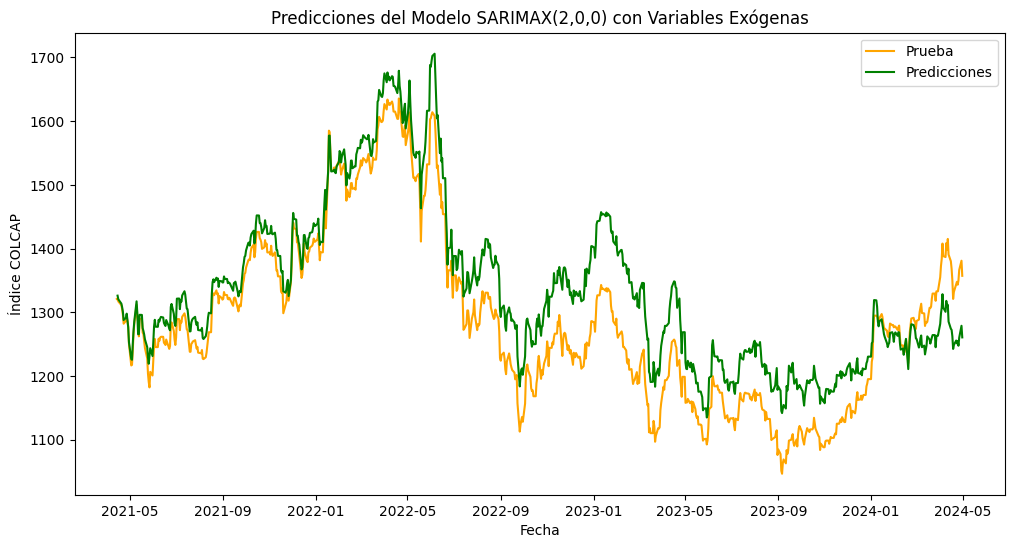

In [ ]:
# El mismo gráfico pero solo en el período de predicción

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(df['COLCAP'].index[train_size:], df['COLCAP'][train_size:], label='Prueba', color='orange')
plt.plot(predictions.index, predictions, label='Predicciones', color='green')
plt.xlabel('Fecha')
plt.ylabel('Índice COLCAP')
plt.title('Predicciones del Modelo SARIMAX(2,0,0) con Variables Exógenas')
plt.legend()
plt.show()

### Enfoque con factor estacional

In [ ]:
# Seleccionar la serie COLCAP ya diferenciada
colcap_diff = df_estacionarias['COLCAP']

# Definir las variables exógenas a considerar
exogenous_vars = ['EMBI', 'DOLAR', 'CIB', 'FTSE COLOMBIA', 'EMM', 'BRENT', 'GXG', 'ILF']

# Dividir los datos en entrenamiento y prueba
train_size = int(len(colcap_diff) * 0.8)
train_diff, test_diff = colcap_diff[:train_size], colcap_diff[train_size:]
train_exog, test_exog = df_estacionarias[exogenous_vars][:train_size], df_estacionarias[exogenous_vars][train_size:]

# Combinaciones de al menos 4 variables exógenas
# combinations_of_vars = [combo for combo in combinations(exogenous_vars, 4)]

# Evaluar combinaciones de variables exógenas y componentes estacionales utilizando AIC
best_aic = np.inf
best_order = None
best_seasonal_order = None
best_model = None
best_vars = None

# Parámetros estacionales
seasonal_p = range(0, 2)
seasonal_d = [0, 1]
seasonal_q = range(0, 2)
seasonal_s = [5, 7]

for sp in seasonal_p:
  for sd in seasonal_d:
    for sq in seasonal_q:
      for ss in seasonal_s:

        model = SARIMAX(train_diff, order=(2, 0, 0), seasonal_order=(sp, sd, sq, ss), exog=train_exog[['FTSE COLOMBIA', 'EMM', 'BRENT', 'GXG']])
        model_fit = model.fit(disp=False)
        aic = model_fit.aic
        if aic < best_aic:
            best_aic = aic
            best_order = (2, 0, 0)
            best_seasonal_order = (sp, sd, sq, ss)
            best_model = model_fit
            best_vars = ['FTSE COLOMBIA', 'EMM', 'BRENT', 'GXG']


print(f'El mejor modelo SARIMAX encontrado es: SARIMAX{best_order} con orden estacional {best_seasonal_order}, AIC={best_aic} y variables exógenas: {best_vars}')
print(best_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

El mejor modelo SARIMAX encontrado es: SARIMAX(2, 0, 0) con orden estacional (0, 0, 0, 5), AIC=18310.239253510143 y variables exógenas: ['FTSE COLOMBIA', 'EMM', 'BRENT', 'GXG']
                               SARIMAX Results                                
Dep. Variable:                 COLCAP   No. Observations:                 3176
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -9148.120
Date:                Mon, 01 Jul 2024   AIC                          18310.239
Time:                        22:28:10   BIC                          18352.683
Sample:                    02-11-2009   HQIC                         18325.462
                         - 04-14-2021                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
FTSE COLOMBIA     0.2683   

In [ ]:
# Realizar predicciones en el conjunto de prueba
predictions_diff = best_model.predict(start=len(train_diff), end=len(train_diff) + len(test_diff) - 1, exog=test_exog[list(best_vars)])

# Invertir la diferenciación para obtener las predicciones en el contexto original
# Crear una serie vacía para las predicciones invertidas
predictions = pd.Series(index=test_diff.index, dtype=float)

# Revertir la diferenciación utilizando los valores de la serie original
for i in range(len(predictions_diff)):
    if i == 0:
        predictions.iloc[i] = df['COLCAP'].iloc[train_size] + predictions_diff.iloc[i]
    else:
        predictions.iloc[i] = predictions.iloc[i - 1] + predictions_diff.iloc[i]

# Evaluar el desempeño del modelo
mse = mean_squared_error(df['COLCAP'][test_diff.index], predictions)
print(f'Error cuadrático medio (MSE): {mse}')

Error cuadrático medio (MSE): 4229.376568163738


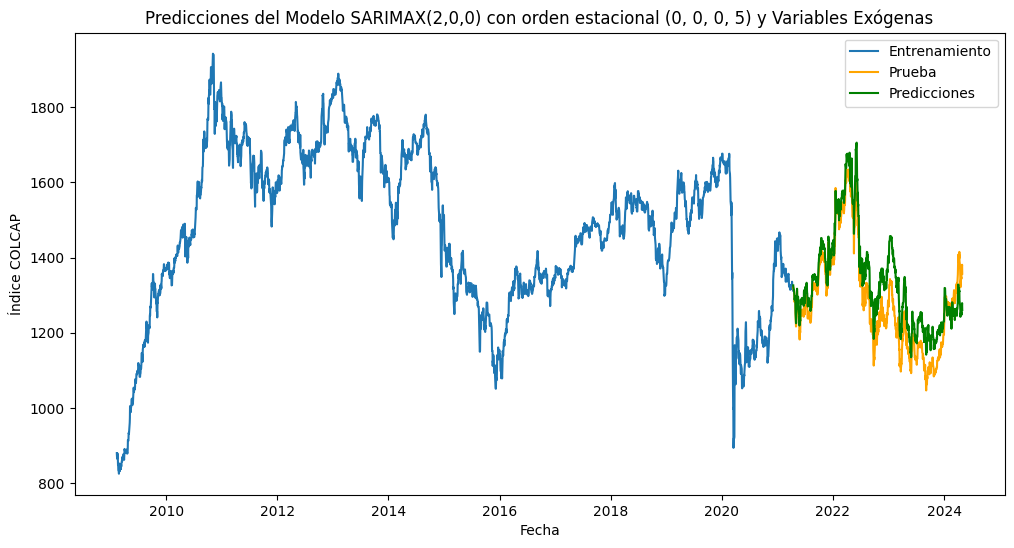

In [ ]:
# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(df['COLCAP'].index[:train_size], df['COLCAP'][:train_size], label='Entrenamiento')
plt.plot(df['COLCAP'].index[train_size:], df['COLCAP'][train_size:], label='Prueba', color='orange')
plt.plot(predictions.index, predictions, label='Predicciones', color='green')
plt.xlabel('Fecha')
plt.ylabel('Índice COLCAP')
plt.title('Predicciones del Modelo SARIMAX(2,0,0) con orden estacional (0, 0, 0, 5) y Variables Exógenas')
plt.legend()
plt.show()

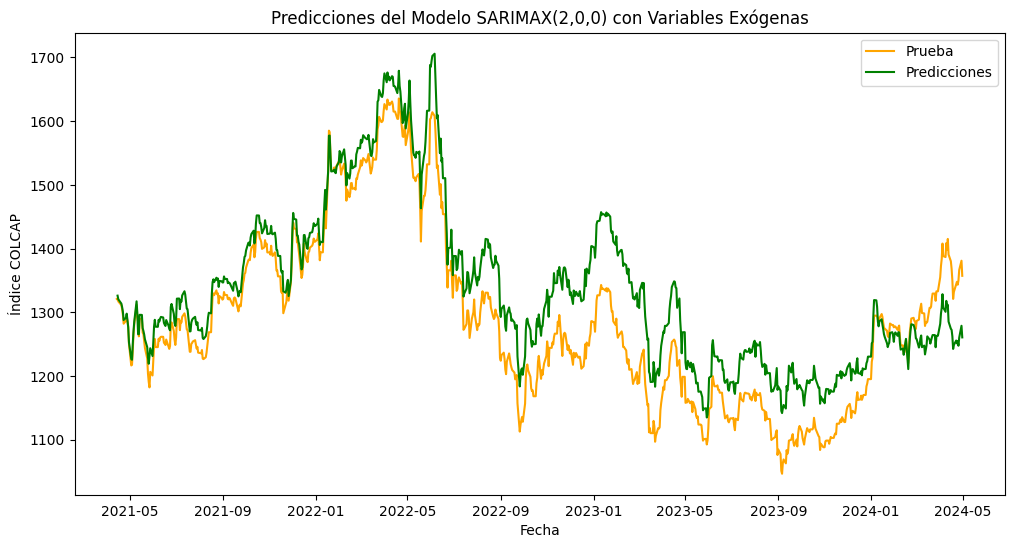

In [ ]:
# El mismo gráfico pero solo en el período de predicción

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(df['COLCAP'].index[train_size:], df['COLCAP'][train_size:], label='Prueba', color='orange')
plt.plot(predictions.index, predictions, label='Predicciones', color='green')
plt.xlabel('Fecha')
plt.ylabel('Índice COLCAP')
plt.title('Predicciones del Modelo SARIMAX(2,0,0) con Variables Exógenas')
plt.legend()
plt.show()

# Redes Neuronales Recurrentes (RNN)

## LSTM

### Construcción del modelo LSTM

In [ ]:
datos = df[['COLCAP', 'FTSE COLOMBIA', 'EMM', 'BRENT', 'GXG']]
datos.head()

COLCAP  FTSE COLOMBIA    EMM  BRENT    GXG
FECHA                                                 
2009-02-10  879.72        2452.51  23.17  44.61  30.00
2009-02-11  874.27        2438.27  23.87  44.28  30.00
2009-02-12  865.27        2404.89  23.72  44.65  30.00
2009-02-13  879.41        2452.28  23.84  44.81  30.48
2009-02-16  878.55        2443.00  23.84  43.28  30.48

In [ ]:
# Split data
size = int(len(datos)*0.8)
X_train, X_test = datos.iloc[:size], datos.iloc[size:]

In [ ]:
# Datos de entrenamiento
y_train = X_train['COLCAP'][1:].values
exog_train = X_train[['FTSE COLOMBIA', 'EMM', 'BRENT', 'GXG']][1:].values

In [ ]:
import datetime

# Datos de prueba
start_date = datetime.datetime.strftime(datos.iloc[len(X_train)].name, '%Y-%m-%d')
end_date = datetime.datetime.strftime(datos.iloc[-1].name, '%Y-%m-%d')
y_test = X_test['COLCAP'][start_date:end_date].values
exog_test = X_test[['FTSE COLOMBIA', 'EMM', 'BRENT', 'GXG']][start_date:end_date].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalizar los datos
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

In [ ]:
scaler_exog = MinMaxScaler(feature_range=(0, 1))
exog_train_scaled = scaler_exog.fit_transform(exog_train)
exog_test_scaled = scaler_exog.transform(exog_test)

In [ ]:
# Combinar y_train_scaled y exog_train_scaled
train_data = np.hstack((y_train_scaled, exog_train_scaled))
test_data = np.hstack((y_test_scaled, exog_test_scaled))

In [ ]:
# Crear una función para crear secuencias de datos
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i, 0])  # La primera columna es la variable dependiente
    return np.array(X), np.array(y)

In [ ]:
seq_length = 60
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Definir el modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
history

Epoch 1/50
78/78 [==============================] - 19s 111ms/step - loss: 0.0219 - val_loss: 0.0039
Epoch 2/50
78/78 [==============================] - 5s 60ms/step - loss: 0.0050 - val_loss: 0.0029
Epoch 3/50
78/78 [==============================] - 5s 68ms/step - loss: 0.0040 - val_loss: 0.0028
Epoch 4/50
78/78 [==============================] - 5s 70ms/step - loss: 0.0041 - val_loss: 0.0027
Epoch 5/50
78/78 [==============================] - 5s 59ms/step - loss: 0.0036 - val_loss: 0.0027
Epoch 6/50
78/78 [==============================] - 6s 80ms/step - loss: 0.0037 - val_loss: 0.0026
Epoch 7/50
78/78 [==============================] - 5s 60ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 8/50
78/78 [==============================] - 5s 59ms/step - loss: 0.0034 - val_loss: 0.0027
Epoch 9/50
78/78 [==============================] - 6s 82ms/step - loss: 0.0035 - val_loss: 0.0024
Epoch 10/50
78/78 [==============================] - 5s 59ms/step - loss: 0.0034 - val_loss: 0.0023
Epoch 1

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            11200     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 31451 (122.86 KB)
Trainable params: 31451 (122.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Hacer predicciones
predictions_scaled = model.predict(X_test)

# Desnormalizar las predicciones
predictions = scaler_y.inverse_transform(predictions_scaled)

# Desnormalizar los valores reales de y_test
y_test_descaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Crear un DataFrame para visualizar las predicciones y los valores reales
df_results = pd.DataFrame({
    'Real': y_test_descaled.flatten(),
    'Predicted': predictions.flatten()
})

df_results

23/23 [==============================] - 1s 16ms/step


Real    Predicted
0    1286.43  1275.376099
1    1284.04  1280.499756
2    1293.02  1283.617432
3    1298.44  1286.687012
4    1293.76  1290.556519
..       ...          ...
730  1343.34  1318.579346
731  1349.93  1318.756470
732  1366.61  1319.971680
733  1381.01  1324.838379
734  1357.31  1334.461670

[735 rows x 2 columns]

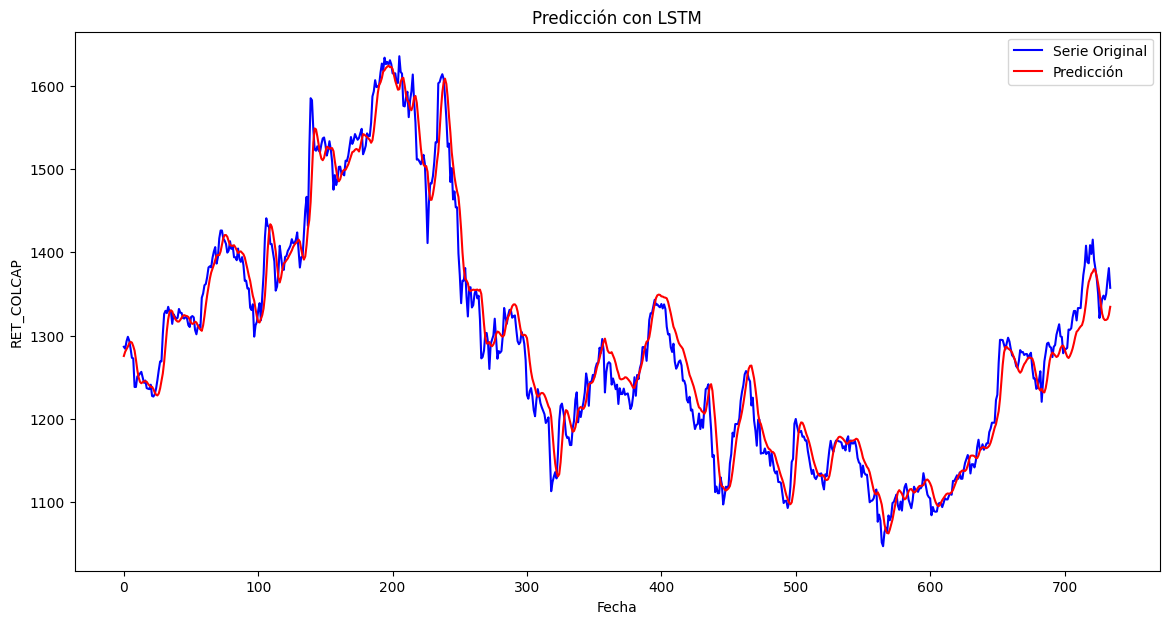

In [ ]:
import matplotlib.pyplot as plt

# Crear una figura y un eje
plt.figure(figsize=(14, 7))

# Graficar la serie original
plt.plot(df_results.index, df_results['Real'], label='Serie Original', color='blue')

# Graficar la predicción
plt.plot(df_results.index, df_results['Predicted'], label='Predicción', color='red')

# Añadir título y etiquetas de los ejes
plt.title('Predicción con LSTM')
plt.xlabel('Fecha')
plt.ylabel('RET_COLCAP')

# Añadir una leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test_descaled, predictions)
mae = mean_absolute_error(y_test_descaled, predictions)
mape = np.mean(np.abs((y_test_descaled - predictions) / y_test_descaled)) * 100

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Error Absoluto Medio (MAE): {mae}')
print(f'Error Porcentual Absoluto Medio (MAPE): {mape:.2f}%')


Error Cuadrático Medio (MSE): 653.7703518069624
Error Absoluto Medio (MAE): 18.89894550515518
Error Porcentual Absoluto Medio (MAPE): 1.47%


In [ ]:
def descaler(scaled_data, scaler, original_shape):
    scaled_data_reshaped = scaled_data.reshape(-1, 1)
    descaled_data = scaler.inverse_transform(np.concatenate((scaled_data_reshaped, np.zeros((scaled_data_reshaped.shape[0], original_shape - 1))), axis=1))
    return descaled_data[:, 0]

In [ ]:
# Realizar predicciones en el conjunto de entrenamiento
train_predictions = model.predict(X_train)

# Desescalar las predicciones del conjunto de entrenamiento
train_predictions_descaled = descaler(train_predictions, scaler_y, len(series))

# Desescalar los valores reales del conjunto de entrenamiento
y_train_descaled = descaler(y_train, scaler_y, len(series))

# Calcular MSE, MAE y MAPE para el conjunto de entrenamiento
train_mse = mean_squared_error(y_train_descaled, train_predictions_descaled)
train_mae = mean_absolute_error(y_train_descaled, train_predictions_descaled)
train_mape = np.mean(np.abs((y_train_descaled - train_predictions_descaled) / y_train_descaled)) * 100

print(f'Error Cuadrático Medio (MSE) en Entrenamiento: {train_mse}')
print(f'Error Absoluto Medio (MAE) en Entrenamiento: {train_mae}')
print(f'Error Porcentual Absoluto Medio (MAPE) en Entrenamiento: {train_mape:.2f}%')

98/98 [==============================] - 3s 33ms/step
Error Cuadrático Medio (MSE) en Entrenamiento: 566.4881870656754
Error Absoluto Medio (MAE) en Entrenamiento: 15.637790785666255
Error Porcentual Absoluto Medio (MAPE) en Entrenamiento: 1.09%
